# EDA of Property_stolen_and_recovered_nature_of_property_2001_2010

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/tabrezkhan/Downloads/India_Crime - Copy/11_Property_stolen_and_recovered_nature_of_property_2001_2010.csv')
df

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Cattle - Property,2. Cattle,0,1,0,1000
1,Andhra Pradesh,2001,Cattle - Property,2. Cattle,448,580,6490596,7233876
2,Arunachal Pradesh,2001,Cattle - Property,2. Cattle,22,34,135500,704500
3,Assam,2001,Cattle - Property,2. Cattle,149,322,683350,1816386
4,Bihar,2001,Cattle - Property,2. Cattle,144,334,896019,1911068
...,...,...,...,...,...,...,...,...
4545,Tamil Nadu,2010,Total Property(Nature),Total Property Stolen & Recovered,16125,21509,660311804,1317919190
4546,Tripura,2010,Total Property(Nature),Total Property Stolen & Recovered,192,879,5666102,33032746
4547,Uttar Pradesh,2010,Total Property(Nature),Total Property Stolen & Recovered,9130,35068,577591772,1442670414
4548,Uttarakhand,2010,Total Property(Nature),Total Property Stolen & Recovered,964,2234,47135685,123398840


In [3]:
#check for null value
df.isnull().sum()

Area_Name                      0
Year                           0
Group_Name                     0
Sub_Group_Name                 0
Cases_Property_Recovered       0
Cases_Property_Stolen          0
Value_of_Property_Recovered    0
Value_of_Property_Stolen       0
dtype: int64

There are No missing value

In [4]:
df['Group_Name'].unique()

array(['Cattle - Property',
       'Communication and Electricity Wire - Property',
       'Cultural Property including Antiques - Property',
       'Cycle - Property', 'Electronic Components - Property',
       'Fire arms - Property',
       'Motor Vehicles - Motor car/Taxi/Jeep - Property',
       'Motor Vehicles - Others - Property', 'Motor Vehicles - Property',
       'Motor Vehicles -\tMotor Cycles/Scooters - Property',
       'Other Nature of Property', 'Total Property(Nature)'], dtype=object)

In [5]:
df['Sub_Group_Name'].unique()

array(['2. Cattle', '1. Communation and Electricity Wire',
       '8. Cultural Property including Antiques', '3. Cycle',
       '7. Electronic Components', '5. Fire Arms',
       '6. Explosives/Explosive Substances',
       '4.2 Motor Vehicles - Motor Car/Taxi/Jeep',
       '4.3 Motor Vehicles - Other Motor Vehicles', '4. Motor Vehicles',
       '4.1 Motor Vehicles - Motor Cycle/Scooters',
       '9. Other kinds of Property', 'Total Property Stolen & Recovered'],
      dtype=object)

In [6]:
df.drop('Sub_Group_Name',axis=1 , inplace=True)

In [7]:
df

,Area_Name,Year,Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Cattle - Property,0,1,0,1000
1,Andhra Pradesh,2001,Cattle - Property,448,580,6490596,7233876
2,Arunachal Pradesh,2001,Cattle - Property,22,34,135500,704500
3,Assam,2001,Cattle - Property,149,322,683350,1816386
4,Bihar,2001,Cattle - Property,144,334,896019,1911068
...,...,...,...,...,...,...,...
4545,Tamil Nadu,2010,Total Property(Nature),16125,21509,660311804,1317919190
4546,Tripura,2010,Total Property(Nature),192,879,5666102,33032746
4547,Uttar Pradesh,2010,Total Property(Nature),9130,35068,577591772,1442670414
4548,Uttarakhand,2010,Total Property(Nature),964,2234,47135685,123398840


In [8]:
df.rename(columns={'Area_Name':'STATE/UT'}, inplace=True)

In [9]:
#we notice that there are some states who did not recorded zero reported cases's f property's robbery
df_zero = df[df['Value_of_Property_Stolen'] == 0]
df_zero

,STATE/UT,Year,Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
7,Dadra & Nagar Haveli,2001,Cattle - Property,0,0,0,0
8,Daman & Diu,2001,Cattle - Property,0,0,0,0
18,Lakshadweep,2001,Cattle - Property,0,0,0,0
29,Sikkim,2001,Cattle - Property,0,0,0,0
35,Andaman & Nicobar Islands,2002,Cattle - Property,0,0,0,0
...,...,...,...,...,...,...,...
3833,Lakshadweep,2010,Motor Vehicles -\tMotor Cycles/Scooters - Prop...,0,0,0,0
3841,Puducherry,2010,Motor Vehicles -\tMotor Cycles/Scooters - Prop...,0,0,0,0
3844,Sikkim,2010,Motor Vehicles -\tMotor Cycles/Scooters - Prop...,0,0,0,0
3845,Tamil Nadu,2010,Motor Vehicles -\tMotor Cycles/Scooters - Prop...,0,0,0,0


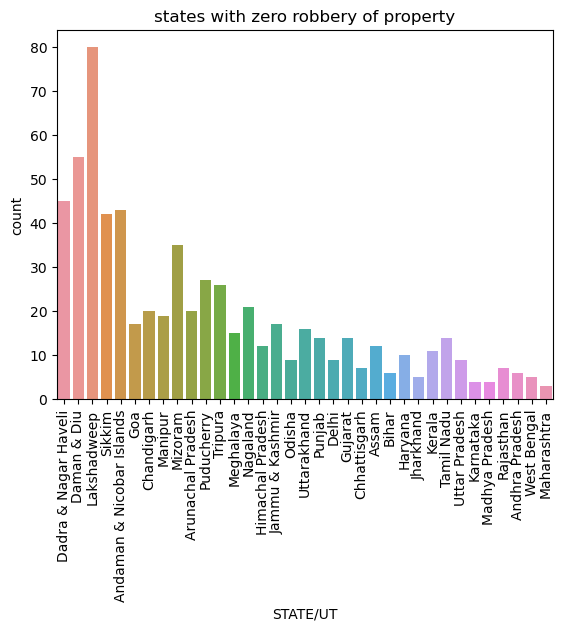

In [6]:
sns.countplot(x=df_zero['STATE/UT'])
plt.title('states with zero robbery of property')
plt.xticks(rotation=90)
plt.show()

- state LAKSHADWEEP has the highest number of no crimes of property's robbery
- state MAHARASHTRA has the lowest number of zero crime of stealing properties

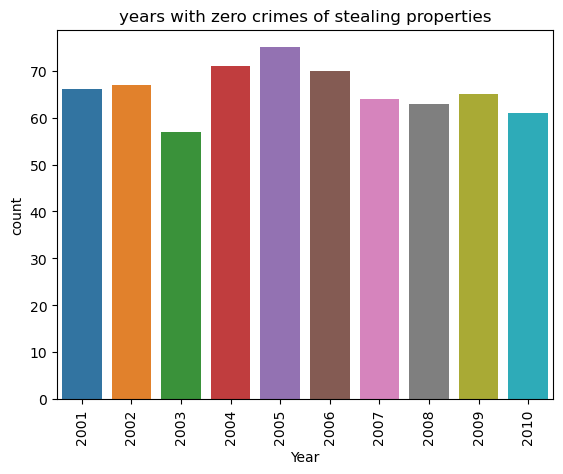

In [10]:
sns.countplot(x=df_zero['Year'])
plt.title('years with zero crimes of stealing properties')
plt.xticks(rotation=90)
plt.show()

- 2005 has the highest number of zero cases of stealing properties
- 2003 has the least record in reporting for zero cases of stealing properties

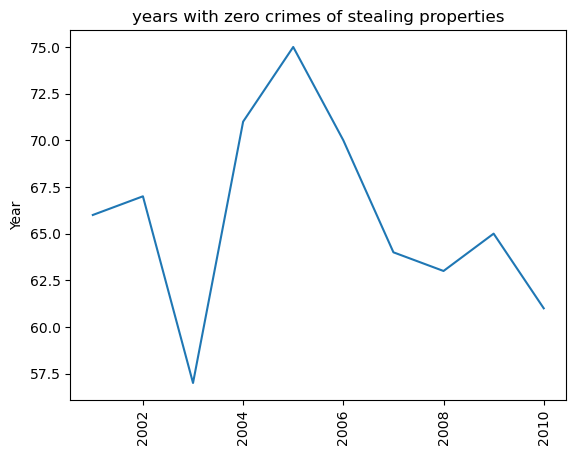

In [11]:
sns.lineplot(data = df_zero['Year'].value_counts())
plt.title('years with zero crimes of stealing properties')
plt.xticks(rotation=90)
plt.show()

- the record of zero crimes of stealing properties decreased rapidly from aboove 65 cases in 2002 to lower than 57 cases in 2003 to increase again to more than 70 cases in 2004 and reaches its peak in 2005 to redecrease again in 2007
- 2005 recorded the highest numbers of reported zero crimes while 2003 is the least

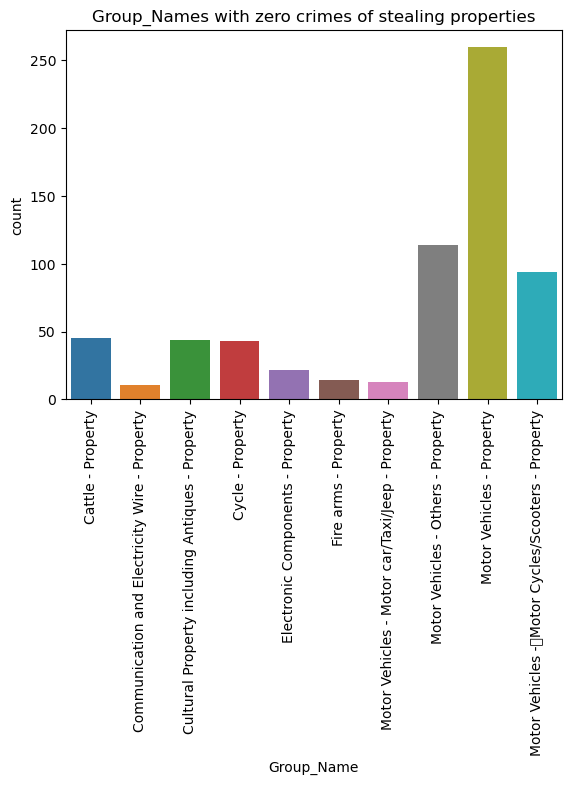

In [12]:
sns.countplot(x=df_zero['Group_Name'])
plt.title('Group_Names with zero crimes of stealing properties')
plt.xticks(rotation=90)
plt.show()

- motor vehicle is the most properties that were not stolen
- motor cycles and scooters are the most non stolen properties among motor vehicles
- cars are the most stolen mtor vehicles

In [13]:
#now let us drop dataset we do not need :
df = df.drop(df_zero.index)

In [14]:
df

,STATE/UT,Year,Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Cattle - Property,0,1,0,1000
1,Andhra Pradesh,2001,Cattle - Property,448,580,6490596,7233876
2,Arunachal Pradesh,2001,Cattle - Property,22,34,135500,704500
3,Assam,2001,Cattle - Property,149,322,683350,1816386
4,Bihar,2001,Cattle - Property,144,334,896019,1911068
...,...,...,...,...,...,...,...
4545,Tamil Nadu,2010,Total Property(Nature),16125,21509,660311804,1317919190
4546,Tripura,2010,Total Property(Nature),192,879,5666102,33032746
4547,Uttar Pradesh,2010,Total Property(Nature),9130,35068,577591772,1442670414
4548,Uttarakhand,2010,Total Property(Nature),964,2234,47135685,123398840


In [15]:
df1 = pd.read_csv('/Users/tabrezkhan/Downloads/States data.csv')
df1

,STATE/UT,population,litercay rate,Area km^2
0,A & N ISLANDS,380581,86.63%,8249
1,ANDHRA PRADESH,84580777,67.02%,162970
2,ARUNACHAL PRADESH,1383727,65.38%,83743
3,ASSAM,31205576,72.19%,78438
4,BIHAR,104099452,61.80%,94163
5,CHANDIGARH,1055450,86.05%,114
6,CHHATTISGARH,25545198,70.28%,135192
7,D & N HAVELI,343709,76.24%,491
8,DAMAN & DIU,243247,87.10%,112
9,DELHI,16787941,86.21%,1483


In [16]:
df1['Density'] = df1['population'] / df1['Area km^2']
df1

,STATE/UT,population,litercay rate,Area km^2,Density
0,A & N ISLANDS,380581,86.63%,8249,46.136623
1,ANDHRA PRADESH,84580777,67.02%,162970,518.995993
2,ARUNACHAL PRADESH,1383727,65.38%,83743,16.523495
3,ASSAM,31205576,72.19%,78438,397.837477
4,BIHAR,104099452,61.80%,94163,1105.523953
5,CHANDIGARH,1055450,86.05%,114,9258.333333
6,CHHATTISGARH,25545198,70.28%,135192,188.954953
7,D & N HAVELI,343709,76.24%,491,700.018330
8,DAMAN & DIU,243247,87.10%,112,2171.848214
9,DELHI,16787941,86.21%,1483,11320.256912


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE/UT       35 non-null     object 
 1   population     35 non-null     int64  
 2   litercay rate  35 non-null     object 
 3   Area km^2      35 non-null     int64  
 4   Density        35 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.5+ KB


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 4549
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   STATE/UT                     3891 non-null   object
 1   Year                         3891 non-null   int64 
 2   Group_Name                   3891 non-null   object
 3   Cases_Property_Recovered     3891 non-null   int64 
 4   Cases_Property_Stolen        3891 non-null   int64 
 5   Value_of_Property_Recovered  3891 non-null   int64 
 6   Value_of_Property_Stolen     3891 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 243.2+ KB


In [19]:
df['STATE/UT'] = df['STATE/UT'].str.upper()

In [20]:
df['STATE/UT'].unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH',
       'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'DELHI', 'GOA',
       'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR',
       'JHARKHAND', 'KARNATAKA', 'KERALA', 'MADHYA PRADESH',
       'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND',
       'ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL',
       'DADRA & NAGAR HAVELI', 'SIKKIM', 'DAMAN & DIU', 'LAKSHADWEEP'],
      dtype=object)

In [21]:
df1['STATE/UT'].unique()

array(['A & N ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM',
       'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA',
       'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'],
      dtype=object)

In [22]:
df['STATE/UT'].replace({'ANDAMAN & NICOBAR ISLANDS':'A & N ISLANDS','DADRA & NAGAR HAVELI':'D & N HAVELI'},inplace=True)

In [23]:
# now let us merge both of datasets :
dff = pd.merge(df,df1, on='STATE/UT',how='right') #how = 'right' we will locate df1 on the right of data
dff

,STATE/UT,Year,Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen,population,litercay rate,Area km^2,Density
0,A & N ISLANDS,2001,Cattle - Property,0,1,0,1000,380581,86.63%,8249,46.136623
1,A & N ISLANDS,2003,Cattle - Property,1,1,1000,1000,380581,86.63%,8249,46.136623
2,A & N ISLANDS,2004,Cattle - Property,1,1,1000,1000,380581,86.63%,8249,46.136623
3,A & N ISLANDS,2008,Cattle - Property,2,3,28600,50600,380581,86.63%,8249,46.136623
4,A & N ISLANDS,2010,Cattle - Property,2,2,16000,16000,380581,86.63%,8249,46.136623
...,...,...,...,...,...,...,...,...,...,...,...
3886,WEST BENGAL,2006,Total Property(Nature),3600,15721,121322464,586751748,91276115,76.26%,88752,1028.440091
3887,WEST BENGAL,2007,Total Property(Nature),3568,17277,138824494,848181023,91276115,76.26%,88752,1028.440091
3888,WEST BENGAL,2008,Total Property(Nature),4109,21809,151338168,926940952,91276115,76.26%,88752,1028.440091
3889,WEST BENGAL,2009,Total Property(Nature),4801,21586,223031097,1095102416,91276115,76.26%,88752,1028.440091


# 2.1 Analysis of Literacy Rate vs Total Crimes

# We will indicate the summury of litercay rate based on year 2010 as we collect data based on the last census commissioner's data of 2010 as we collected data of year 2011 which is based the accumulative previous year so we will indicate our results based on year 2010 as it is the last year before making the last report of collected dataset

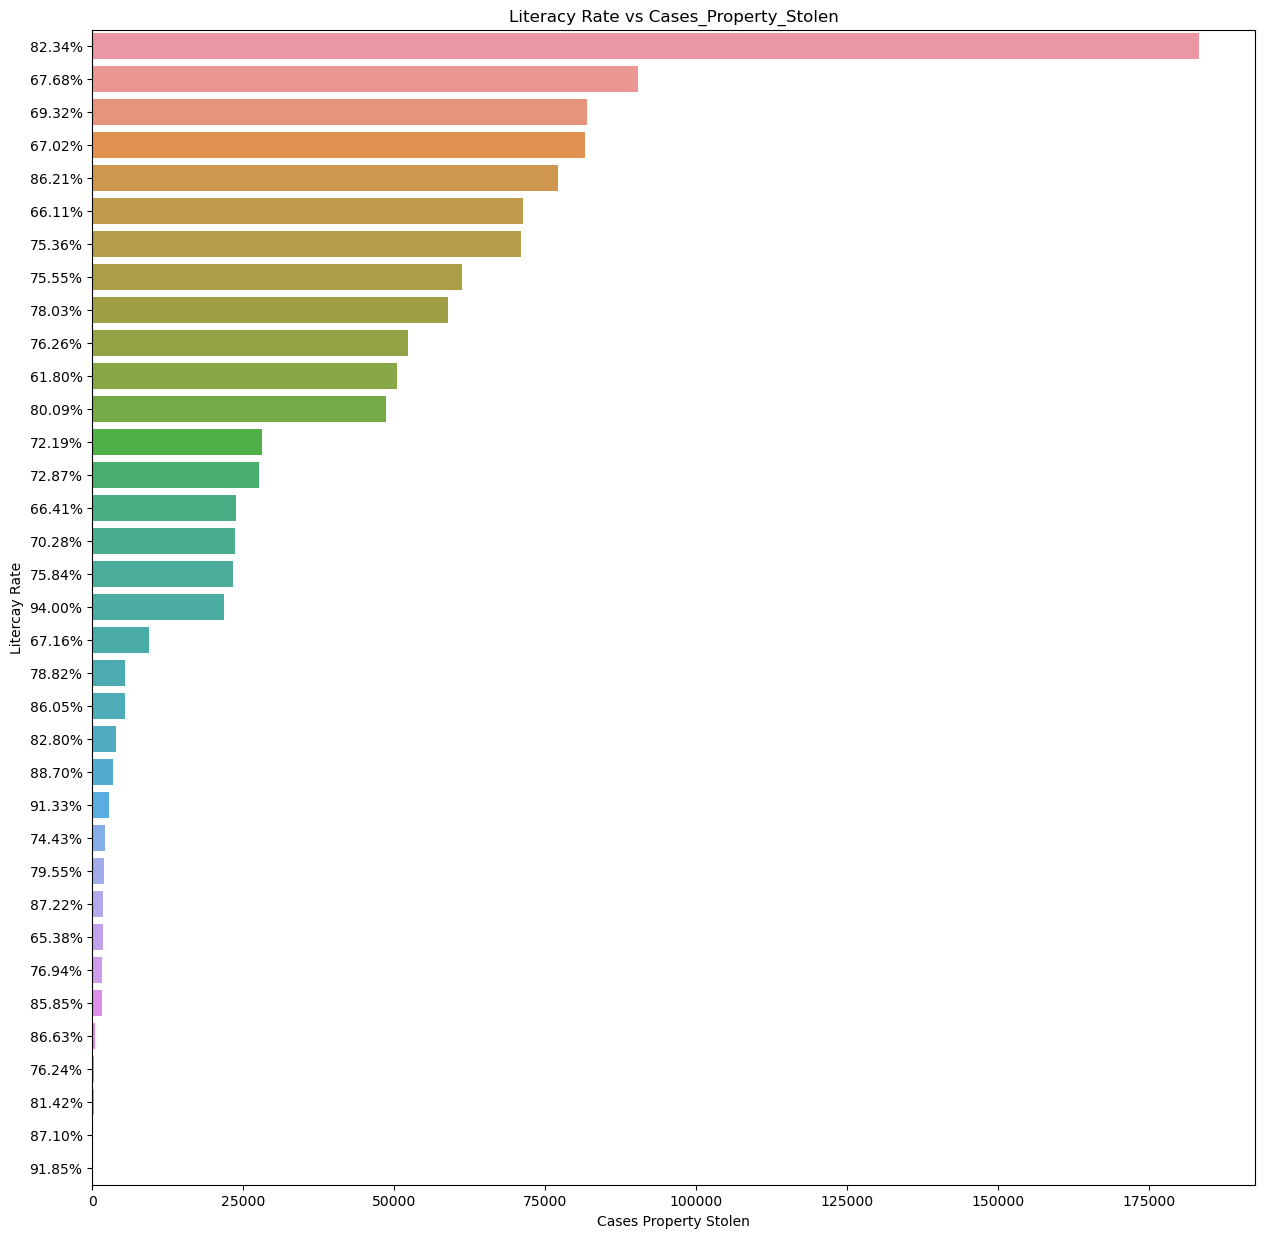

In [24]:
plt.figure(figsize=(15,15))
data = dff[dff['Year'] == 2010]
dt = data.groupby('litercay rate')['Cases_Property_Stolen'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Cases_Property_Stolen' , y='litercay rate' , data=dt)
plt.title('Literacy Rate vs Cases_Property_Stolen')
plt.xlabel('Cases Property Stolen')
plt.ylabel('Litercay Rate')
plt.show()

- population with literacy rate of 82.34 % in state MAHARASHTRA recorded the highest numbers of property's robbery
- population with literacy rate of 91.85 % in state LAKSHADWEEP recorded the lowest number of property's robbery
- stealing properties incresing in societies with literacy rate lower than 80 %
- high literacy rate is not mandatory to prevent stealing property

In [25]:
data = dff[dff['Year'] == 2010]
data[data['Cases_Property_Stolen']==data['Cases_Property_Stolen'].max()]

,STATE/UT,Year,Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen,population,litercay rate,Area km^2,Density
2329,MAHARASHTRA,2010,Total Property(Nature),27960,80663,2337827896,23776254525,112374333,82.34%,307713,365.192023


- Nature property is the most stolen property and it was recorded by literacy rate of 82.34 %

In [26]:
# let us check literacy rates by the mlowest cases of property stolen
data = dff[dff['Year'] == 2010]
data[data['Cases_Property_Stolen']==data['Cases_Property_Stolen'].min()]

,STATE/UT,Year,Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen,population,litercay rate,Area km^2,Density
20,A & N ISLANDS,2010,Cultural Property including Antiques - Property,0,1,0,120000,380581,86.63%,8249,46.136623
231,ARUNACHAL PRADESH,2010,Cultural Property including Antiques - Property,0,1,0,551000,1383727,65.38%,83743,16.523495
643,CHANDIGARH,2010,Motor Vehicles - Others - Property,0,1,0,20000,1055450,86.05%,114,9258.333333
652,CHANDIGARH,2010,Motor Vehicles -\tMotor Cycles/Scooters - Prop...,1,1,100000,100000,1055450,86.05%,114,9258.333333
859,D & N HAVELI,2010,Motor Vehicles - Others - Property,0,1,0,800,343709,76.24%,491,700.018330
894,DAMAN & DIU,2010,Cultural Property including Antiques - Property,1,1,1400000,1400000,243247,87.10%,112,2171.848214
1046,DELHI,2010,Motor Vehicles - Property,0,1,0,50000,16787941,86.21%,1483,11320.256912
1514,HIMACHAL PRADESH,2010,Motor Vehicles - Property,0,1,0,17500,6864602,82.80%,55673,123.302175
1523,HIMACHAL PRADESH,2010,Motor Vehicles -\tMotor Cycles/Scooters - Prop...,0,1,0,1600,6864602,82.80%,55673,123.302175
1636,JAMMU & KASHMIR,2010,Motor Vehicles -\tMotor Cycles/Scooters - Prop...,1,1,16000,20000,12541302,67.16%,55538,225.814793


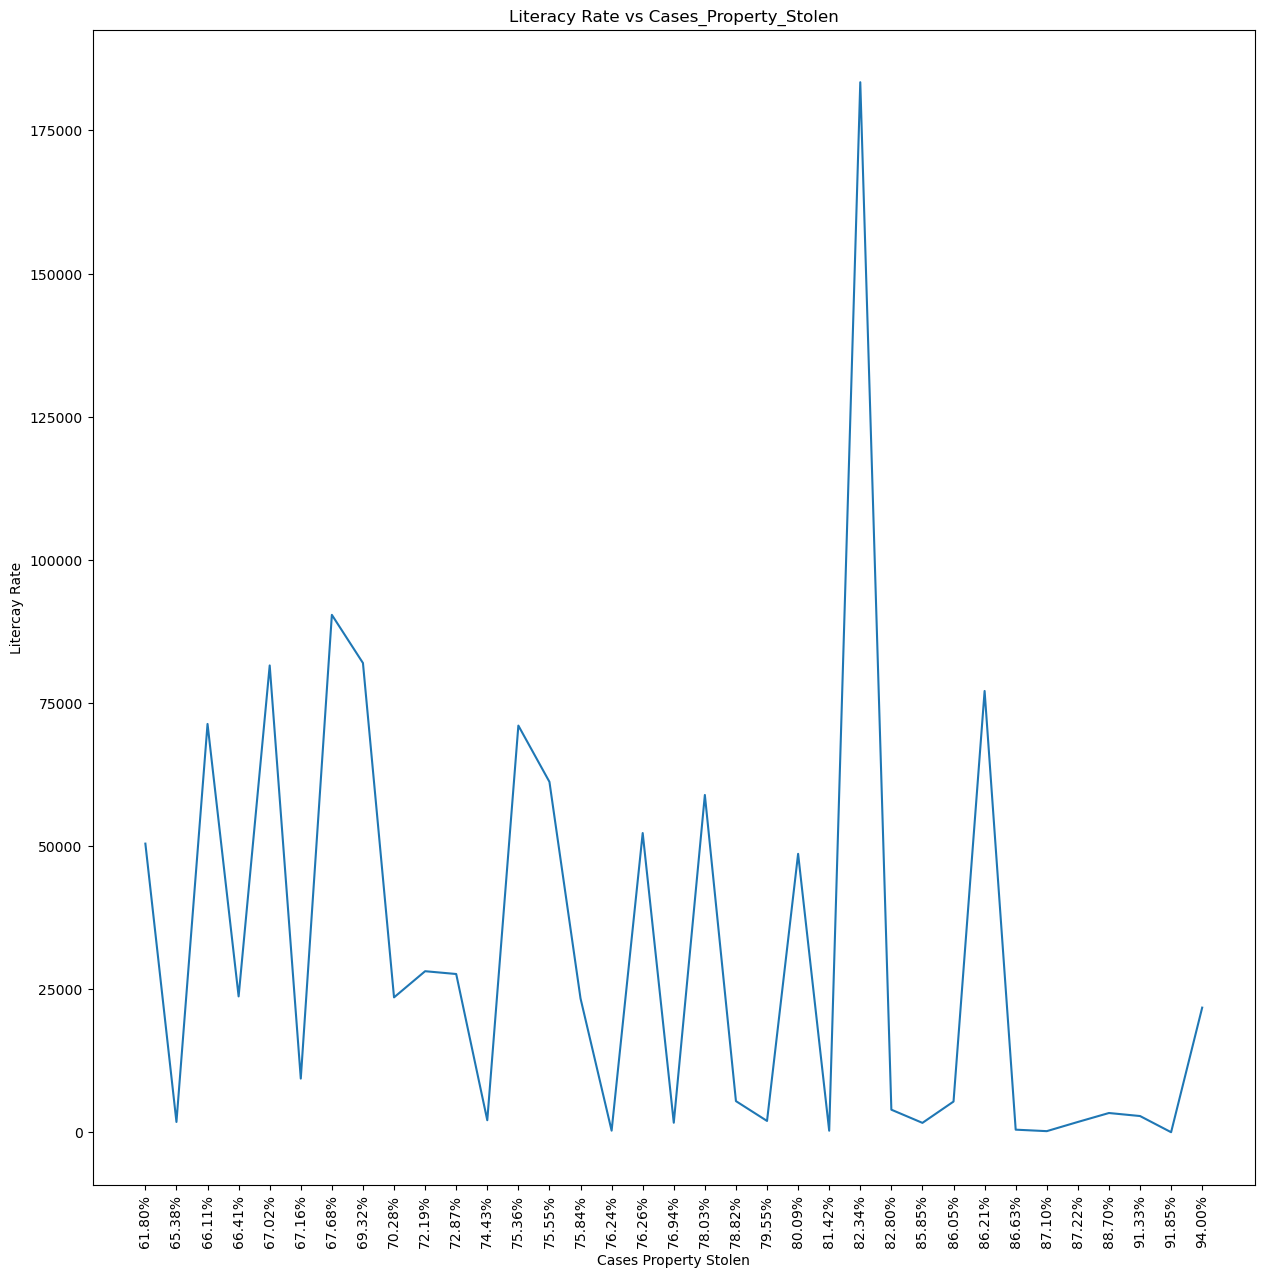

In [28]:
plt.figure(figsize=(15,15))
data = dff[dff['Year'] == 2010]
dt = data.groupby('litercay rate')['Cases_Property_Stolen'].sum()
sns.lineplot(data=dt)
plt.title('Literacy Rate vs Cases_Property_Stolen')
plt.xlabel('Cases Property Stolen')
plt.ylabel('Litercay Rate')
plt.xticks(rotation=90)
plt.show()

- population with literacy rate 82.34 % recorded the highest number of cases of stolen property while 67.68% rate is the second rank
- literacy rate 91.33 % recorded the least recorded cases of stolen prperty
- high literacy rate does not prevent stealing property

# 2.2 Analysis of the type of crime vs each state vs Literacy rate

# Literacy rate vs each type of crimes

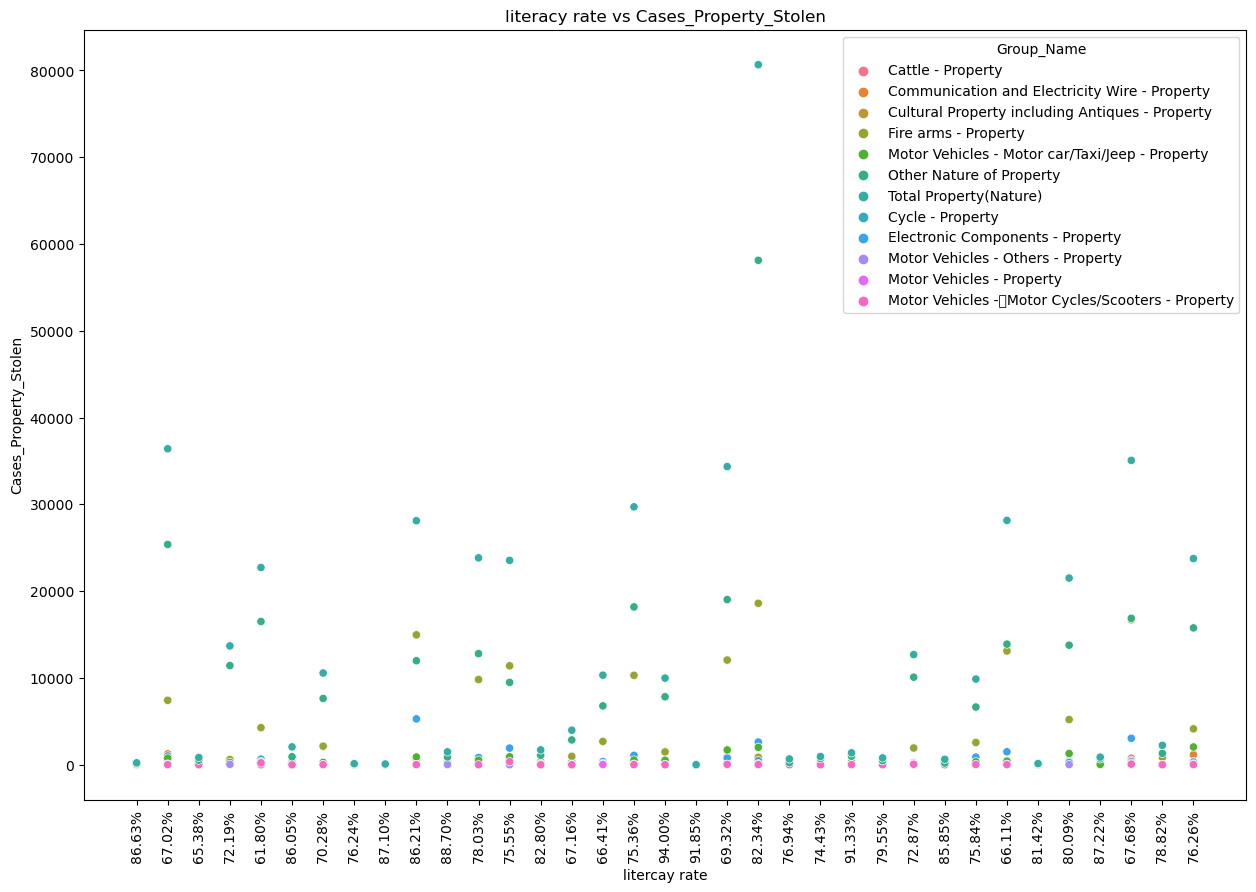

In [29]:
data = dff[dff['Year'] == 2010]
plt.figure(figsize=(15,10))
sns.scatterplot(x=data['litercay rate'] , y=data['Cases_Property_Stolen'] , hue=data['Group_Name'] )
plt.xticks(rotation=90)
plt.title('literacy rate vs Cases_Property_Stolen')
plt.show()

- population with literacy rate of 82.34 % recorded the highest number of stolen property in type of nature properties
- populations with literacy rates of 86.63 % , 76.24 % , 87.10 % , 91.85% and 81.42 % recorded the lowest types of properties by one type of property 

In [30]:
data = dff[dff['Year'] == 2010]
dt = data.groupby('litercay rate')[dff.columns[3:7]].sum()
dt

,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
litercay rate,,,,
61.80%,6836,50421,197482500,1476980130
65.38%,622,1807,85561144,411043478
66.11%,19745,71323,2520704660,4053137718
66.41%,4813,23736,161844352,1144304288
67.02%,46304,81542,1692239055,3425048654
67.16%,3088,9382,289826230,641684802
67.68%,21208,90378,1453342408,3735524071
69.32%,26313,81966,15235167126,17214095474
70.28%,7944,23568,370668567,1158051727


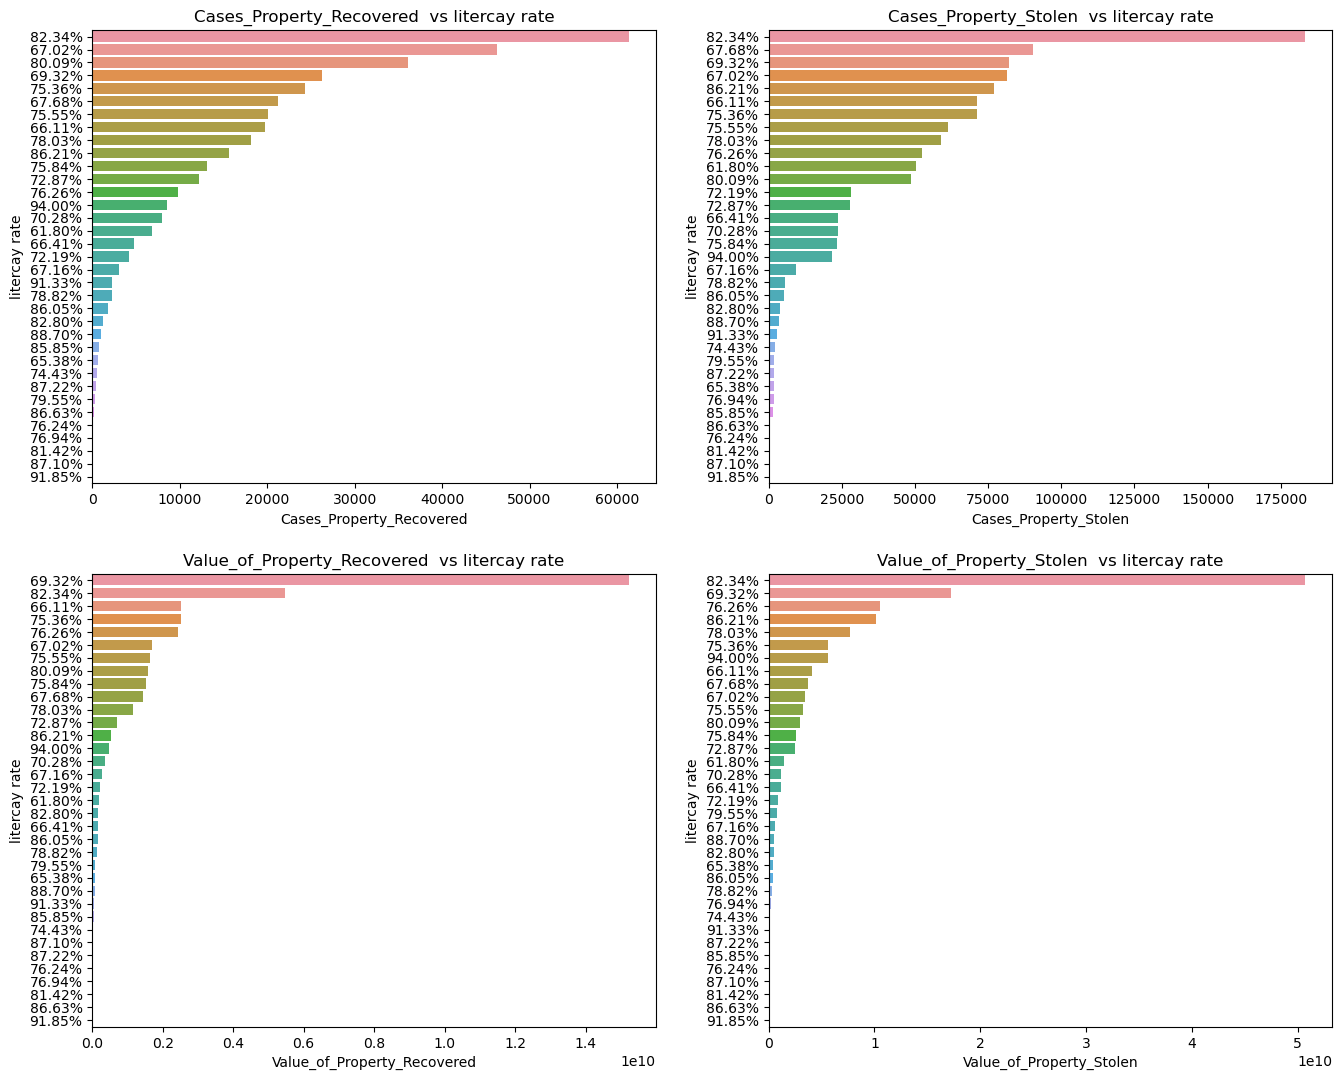

In [32]:
plt.figure(figsize=(16,20))
plot = 1
data = dff[dff['Year'] == 2010]

for i in data.columns[3:7]:
    if plot <=6 :
        ax = plt.subplot(3,2,plot)
        dtt = data.groupby('litercay rate')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dtt[i] , y=dtt['litercay rate'])
        plt.title('{}  vs litercay rate'.format(i))
    plot +=1
plt.show()    

according to year 2010 :
- population with literacy rate of 82.34 % recorded the highest number of cases f stolen and recovered property
- population with literacy rate of 82.34 % recorded the highest values of stolen properties
- population with literacy rate of 69.32 % % recorded the highest values of recovered properties
- population with literacy rate of 91.85 % is the most safe society in preserving private property

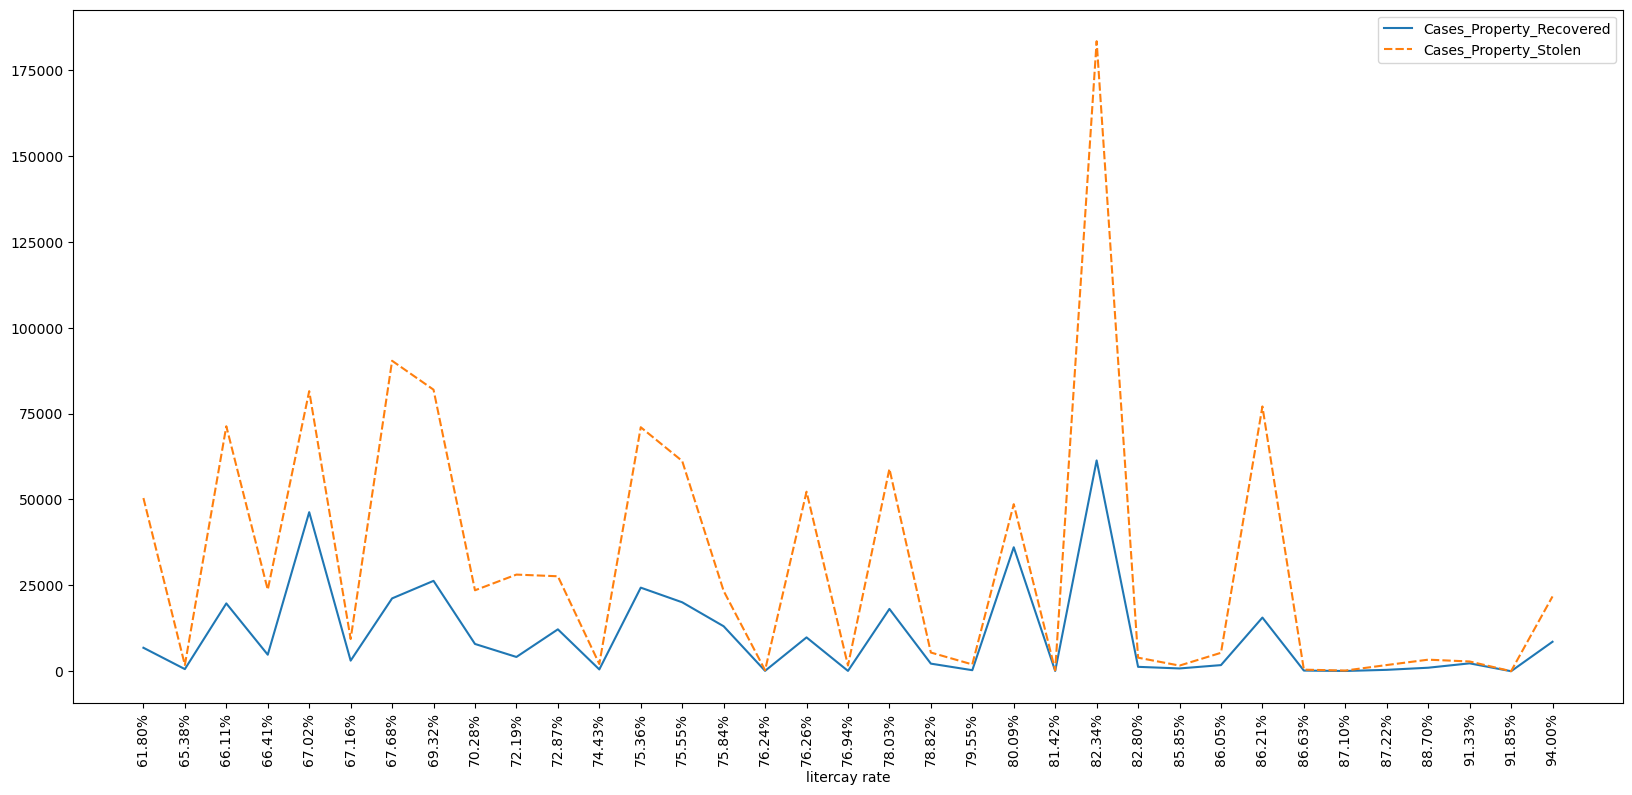

In [35]:
data = dff[dff['Year'] == 2010]
dtt = data.groupby('litercay rate')['Cases_Property_Recovered','Cases_Property_Stolen'].sum()
plt.figure(figsize=(20,9))
sns.lineplot(data=dtt)
plt.xticks(rotation=90)
plt.show()

according to summuries of year 2010 we concluded that :
- stolen property cases are higher than recovered property cases
- literacy rate 82.34 % recorded the highest and the lowest stolen and recovered cases

# type of crime vs each state

# we will indicate stolen and recovered property cases along all years for each State

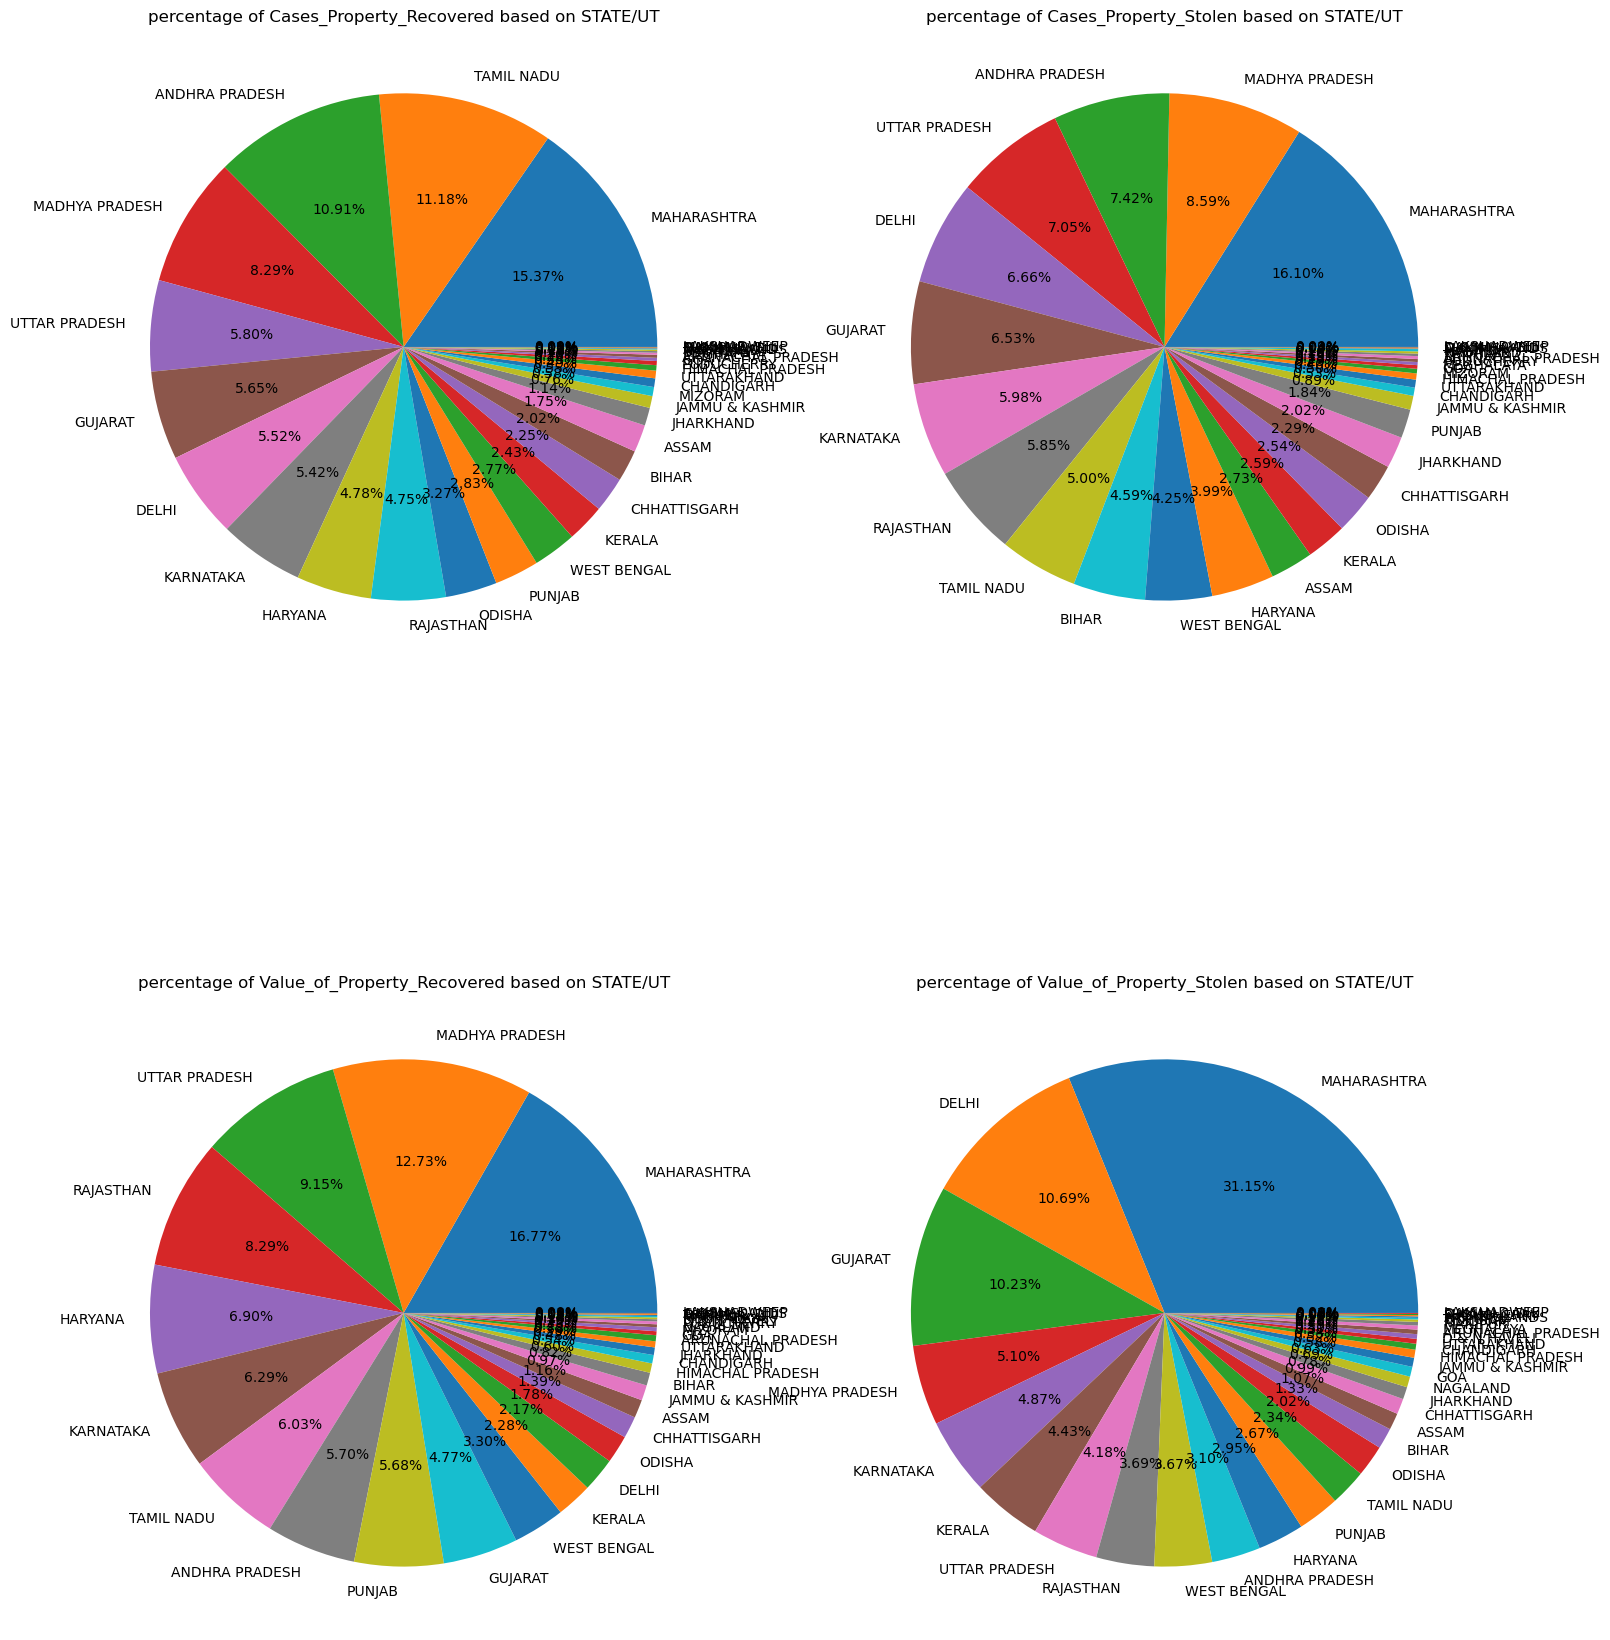

In [61]:
plt.figure(figsize=(18,23))
plot= 1
cols = dff.columns[3:7]
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dtt = dff.groupby('STATE/UT')[i].sum().sort_values(ascending=False).reset_index()
        plt.pie(x=dtt[i] , labels=dtt['STATE/UT'], autopct='%0.2f%%' , data=dtt)
        plt.title('percentage of {} based on STATE/UT'.format(i))
    plot +=1
    
plt.show()

- state MAHARASHTRA recorded the highest numbers of stolen and recovered properties 
- state MAHARASHTRA recored the highest values of stolen properties among all states in a decade
- state MAHARASHTRA recrded the highest values of recovered properties among all states in  a decade

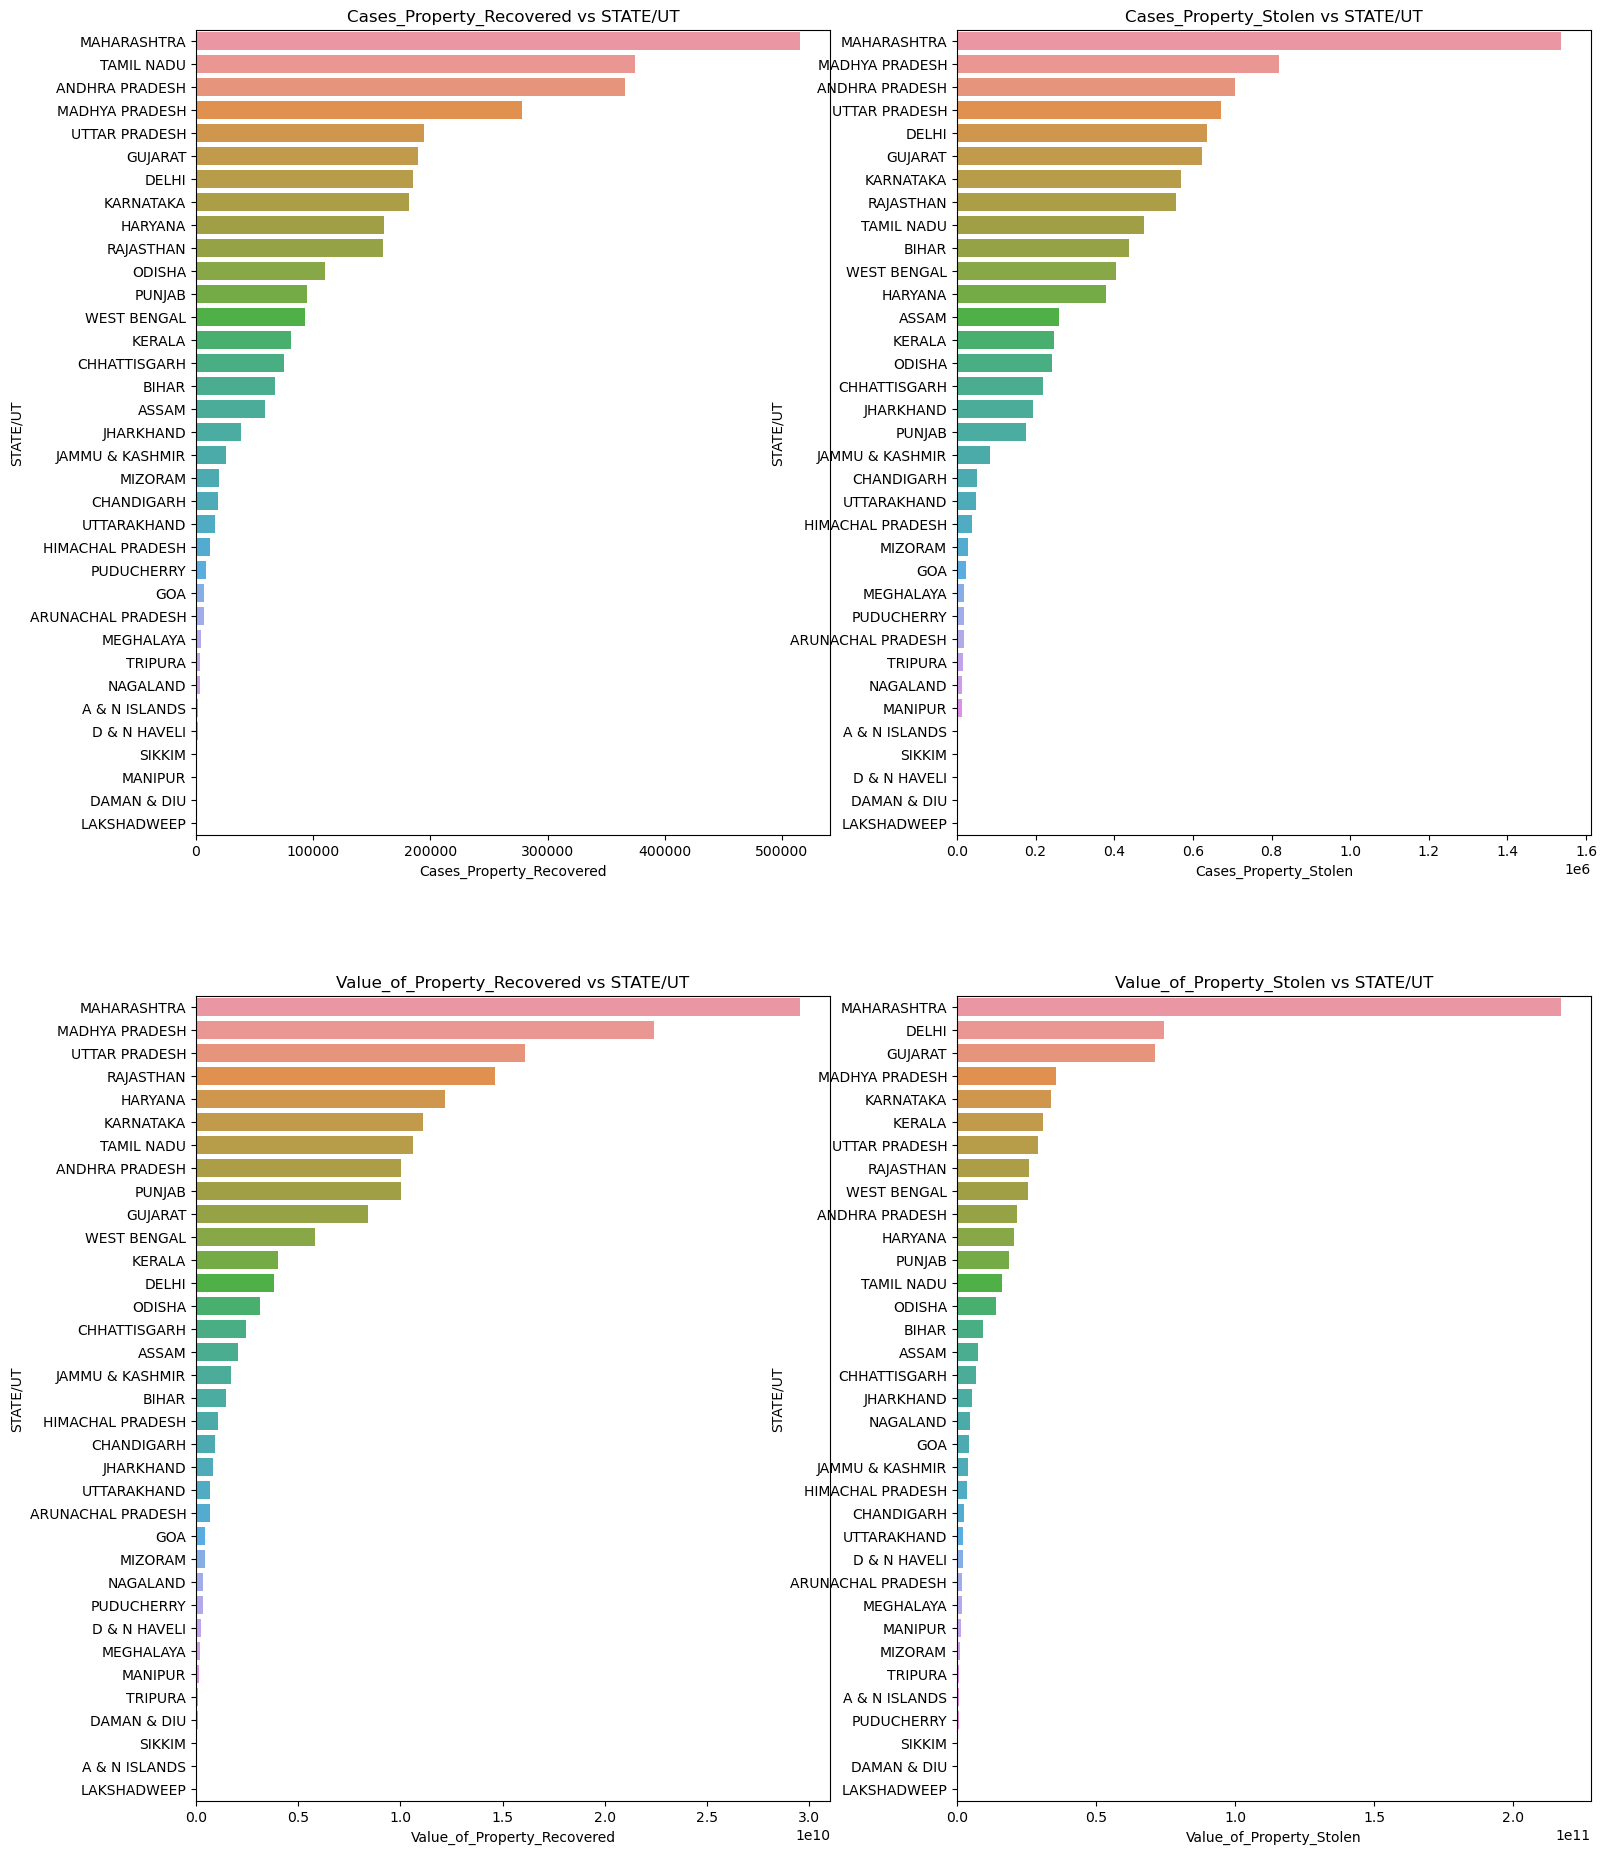

In [62]:
plt.figure(figsize=(18,23))
plot= 1
cols = dff.columns[3:7]
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dtt = dff.groupby('STATE/UT')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dtt[i] , y=dtt['STATE/UT'])
        plt.title('{} vs STATE/UT'.format(i))
    plot +=1
    
plt.show()


- state MAHARASHTRA recorded the highest numbers of stolen and recovered properties
- state MAHARASHTRA recored the highest values of stolen properties among all states in a decade
- state MAHARASHTRA recrded the highest values of recovered properties among all states in a decade
- the availability of recovering stolen property in  state MADHYA PRADESH is much higher than it is in state MAHARASHTRA
- state LAKSHADWEEP is the safiest place for keeping property


In [39]:
dff.columns[3:9]

Index(['Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen', 'population',
       'litercay rate'],
      dtype='object')

In [40]:
prop1 = dff[['Cases_Property_Recovered', 'Cases_Property_Stolen']].sum()
prop1

Cases_Property_Recovered    3351978
Cases_Property_Stolen       9538329
dtype: int64

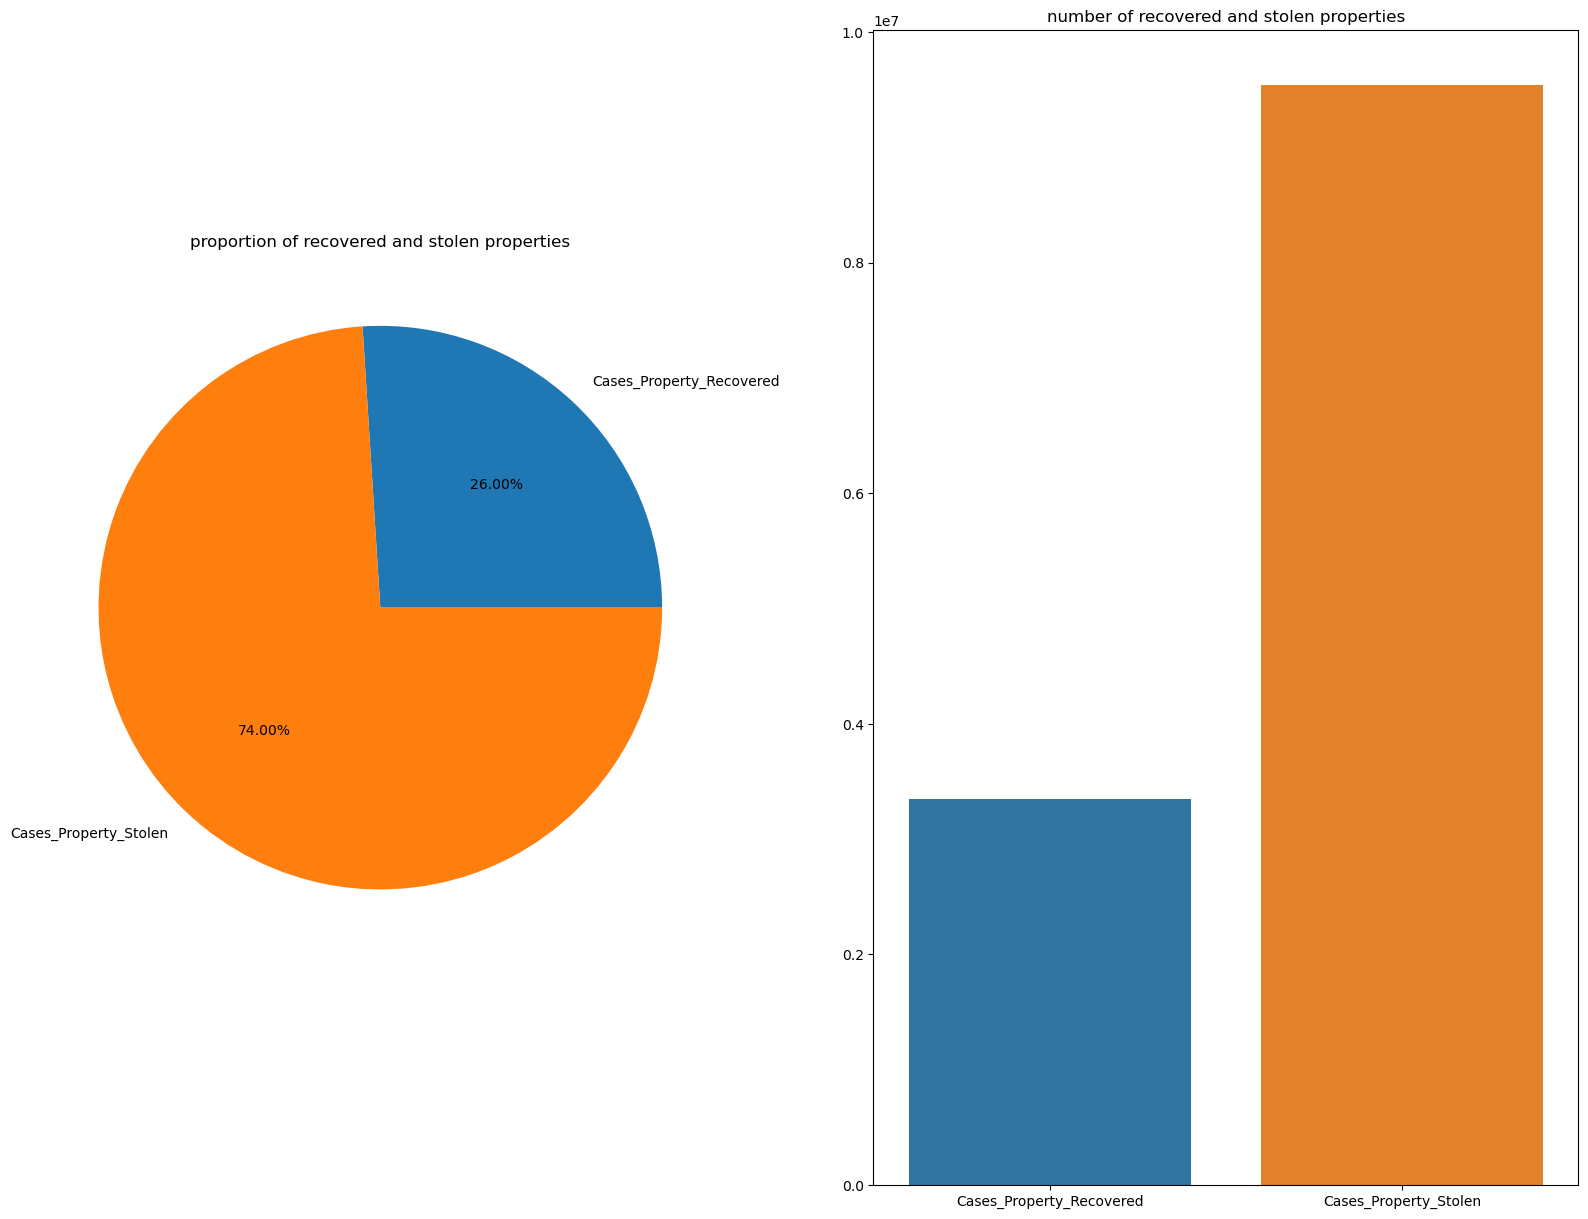

In [42]:
figure , axx = plt.subplots(1,2,figsize=(20,15))
sns.barplot(x=prop1.index , y=prop1.values)
axx[1].set_title('number of recovered and stolen properties')

prop1.plot(kind='pie' , autopct='%0.2f%%' , ax=axx[0])
axx[0].set_title('propocrtion of recovered and stolen properties')
plt.show()

- number of stolen properties are much higher than recovered ones which refers to the lack of security and the uneffectiveness of polices in india

In [43]:
prop2 = dff[['Value_of_Property_Recovered', 'Value_of_Property_Stolen']].sum()
prop2

Value_of_Property_Recovered    176181168686
Value_of_Property_Stolen       696725107995
dtype: int64

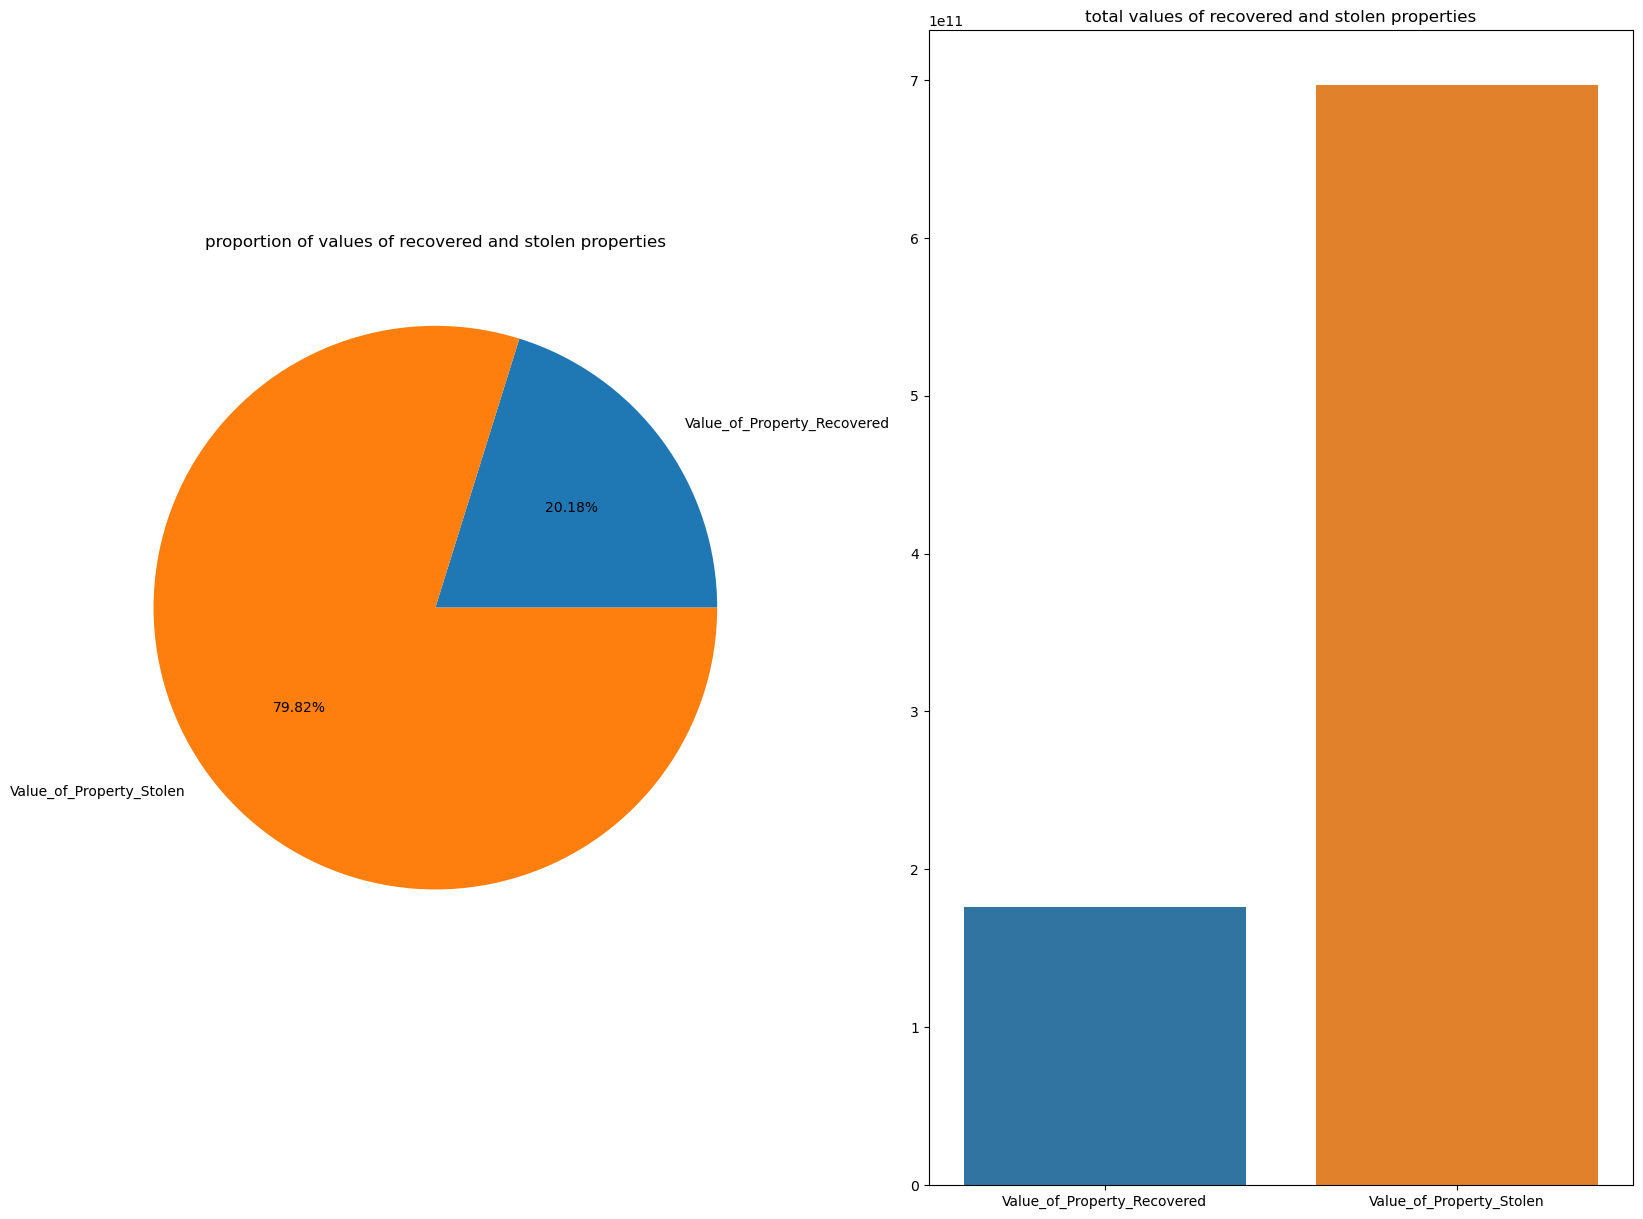

In [44]:
figure , axx = plt.subplots(1,2,figsize=(20,15))
sns.barplot(x=prop2.index , y=prop2.values)
axx[1].set_title('total values of recovered and stolen properties')

prop2.plot(kind='pie' , autopct='%0.2f%%' , ax=axx[0])
axx[0].set_title('proportion of values of recovered and stolen properties')
plt.show()

- values of stolen properties are much higher than recovered properties

# states vs overall crimes

In [45]:
dff['total'] = dff['Cases_Property_Recovered'] + dff['Cases_Property_Stolen']

In [46]:
dff

,STATE/UT,Year,Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen,population,litercay rate,Area km^2,Density,total
0,A & N ISLANDS,2001,Cattle - Property,0,1,0,1000,380581,86.63%,8249,46.136623,1
1,A & N ISLANDS,2003,Cattle - Property,1,1,1000,1000,380581,86.63%,8249,46.136623,2
2,A & N ISLANDS,2004,Cattle - Property,1,1,1000,1000,380581,86.63%,8249,46.136623,2
3,A & N ISLANDS,2008,Cattle - Property,2,3,28600,50600,380581,86.63%,8249,46.136623,5
4,A & N ISLANDS,2010,Cattle - Property,2,2,16000,16000,380581,86.63%,8249,46.136623,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3886,WEST BENGAL,2006,Total Property(Nature),3600,15721,121322464,586751748,91276115,76.26%,88752,1028.440091,19321
3887,WEST BENGAL,2007,Total Property(Nature),3568,17277,138824494,848181023,91276115,76.26%,88752,1028.440091,20845
3888,WEST BENGAL,2008,Total Property(Nature),4109,21809,151338168,926940952,91276115,76.26%,88752,1028.440091,25918
3889,WEST BENGAL,2009,Total Property(Nature),4801,21586,223031097,1095102416,91276115,76.26%,88752,1028.440091,26387


In [47]:
dff.groupby('STATE/UT')['total'].sum().sort_values(ascending=False).reset_index()

,STATE/UT,total
0,MAHARASHTRA,2051035
1,MADHYA PRADESH,1097822
2,ANDHRA PRADESH,1073317
3,UTTAR PRADESH,866807
4,TAMIL NADU,851331
5,DELHI,820775
6,GUJARAT,812336
7,KARNATAKA,752233
8,RAJASTHAN,716936
9,HARYANA,540664


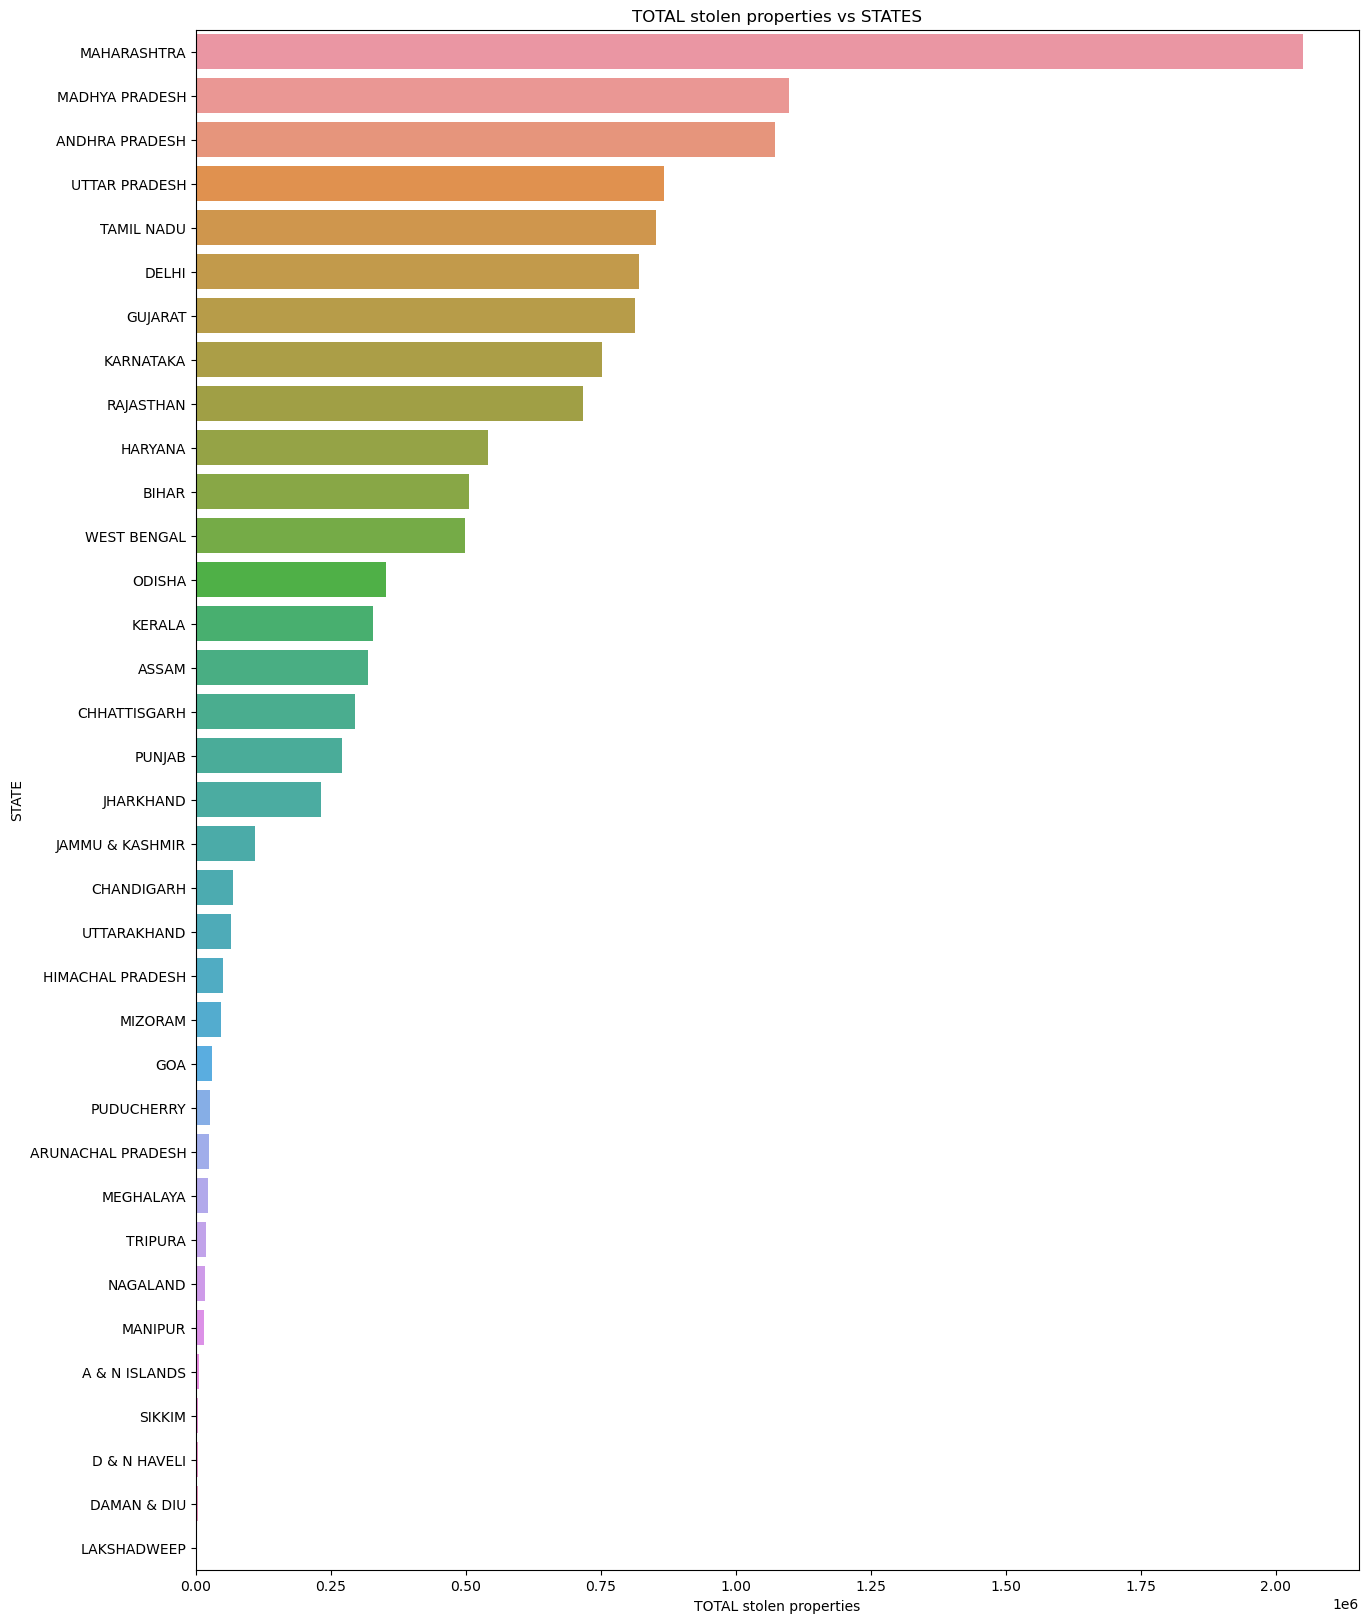

In [48]:
dtt = dff.groupby('STATE/UT')['total'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,20))
sns.barplot(x = dtt['total'] , y = dtt['STATE/UT'] , data=dtt)
plt.title('TOTAL stolen properties vs STATES')
plt.xlabel('TOTAL stolen properties')
plt.ylabel('STATE')
plt.show()

- state MAHARASHTRA is much higher than other states in recorded stolen properties' cases
- LAKSHADWEEP is the much safe state among all states to keep property

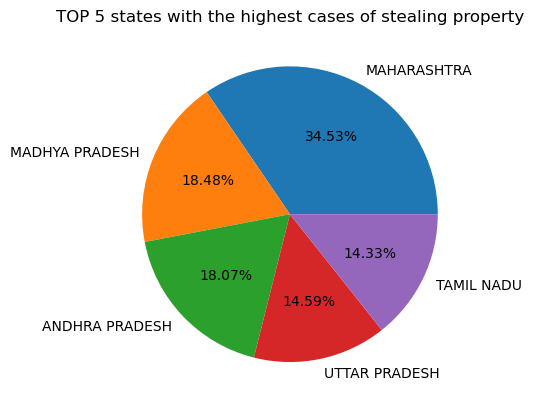

In [51]:
dt = dff.groupby(['STATE/UT'])['total'].sum().sort_values(ascending=False).reset_index()[:5]
plt.pie(x=dt['total'] , labels=dt['STATE/UT'].unique() , data=dt , autopct='%0.2f%%')
plt.title('TOP 5 states with the highest cases of stealing property')
plt.show()

- state MAHARASHTRA recorded the highest number of cases of stolen properties
- state MAHARASHTRA is not a safe place to keep your property in india

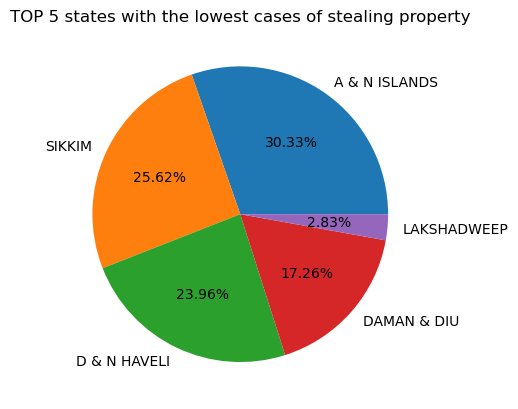

In [52]:
dt = dff.groupby(['STATE/UT'])['total'].sum().sort_values(ascending=False).reset_index()[-5:]
plt.pie(x=dt['total'] , labels=dt['STATE/UT'].unique() , data=dt , autopct='%0.2f%%')
plt.title('TOP 5 states with the lowest cases of stealing property')
plt.show()

- states LAKSHADWEEP is the lowest state that recorded stolen properties and DAMAN & DIU is the second

# insights of different types of stolen properties

In [53]:
dff.groupby('Group_Name')['total'].sum().sort_values(ascending=False).reset_index()

,Group_Name,total
0,Total Property(Nature),5696772
1,Other Nature of Property,3845322
2,Fire arms - Property,2444914
3,Electronic Components - Property,196185
4,Motor Vehicles - Motor car/Taxi/Jeep - Property,173286
5,Cycle - Property,171421
6,Communication and Electricity Wire - Property,149278
7,Cattle - Property,106947
8,Cultural Property including Antiques - Property,78326
9,Motor Vehicles - Others - Property,18854


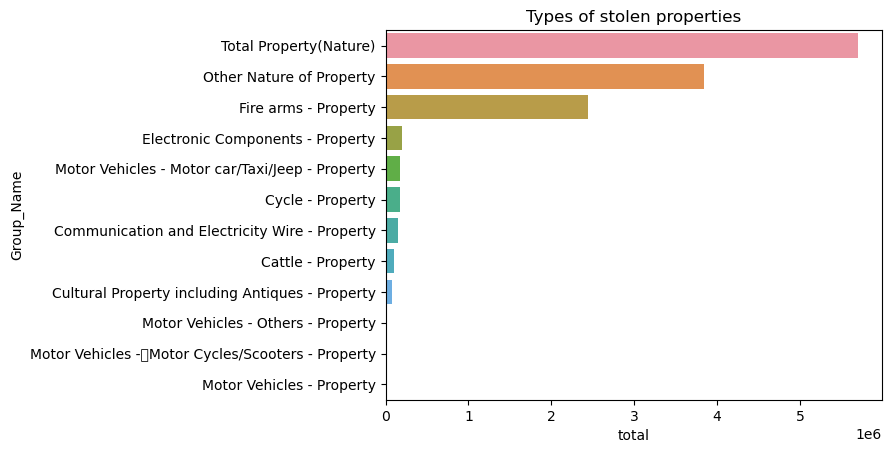

In [55]:
data = dff.groupby('Group_Name')['total'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x=data['total'] , y=data['Group_Name'])
plt.title('Types of stolen properties')
plt.show()

- natural properties are the most stolen properties in india
- other different motor vehicles are the least stolen properties
- cycles and scooters are the least type of motor vehicles that were stolen

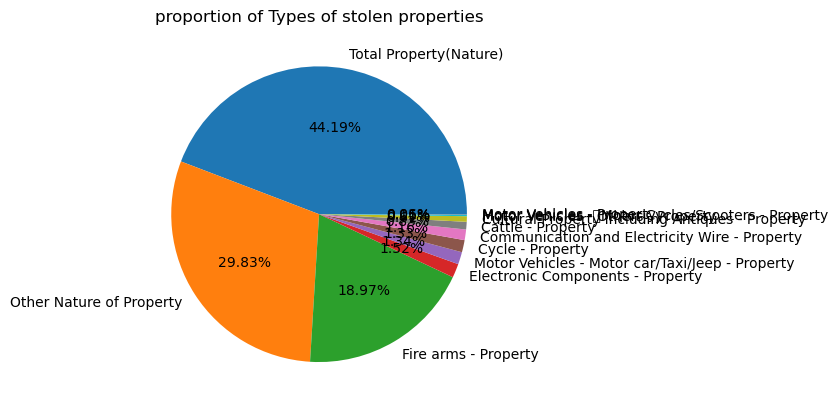

In [58]:
data = dff.groupby('Group_Name')['total'].sum().sort_values(ascending=False).reset_index()
plt.pie(x=data['total'] , labels=data['Group_Name'] ,autopct='%0.2f%%' , data=data)
plt.title('proportion of Types of stolen properties')
plt.show()

- natural properties are the most stolen properties in india like crops and stc..
- fire arms are more stolen than motor vehicles and electronic components

# 2.3 Analysis of year-on-year total crime rate.

In [65]:
dff.groupby('Year')['total'].sum().sort_values(ascending=False).reset_index()

,Year,total
0,2010,1490700
1,2009,1430618
2,2008,1413877
3,2007,1328544
4,2006,1261726
5,2005,1240193
6,2004,1237374
7,2001,1170486
8,2002,1166308
9,2003,1150481


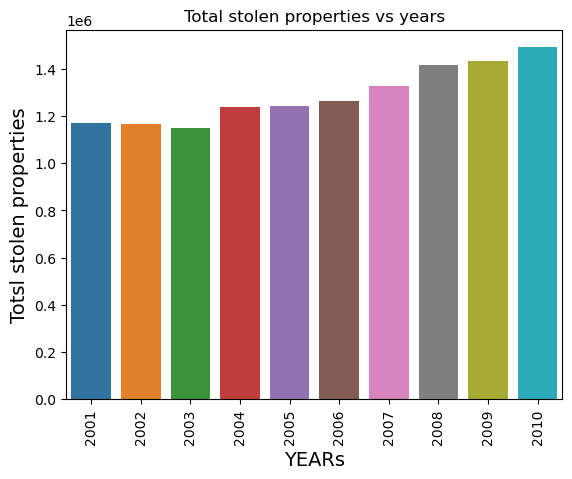

In [66]:
dt = dff.groupby('Year')['total'].sum().sort_values(ascending=False).reset_index()
sns.barplot(y = dt['total'] , x= dt['Year'] , data=dt)
plt.title('Total stolen properties vs years')
plt.ylabel('Totsl stolen properties',fontsize=14)
plt.xlabel('YEARs',fontsize=14)
plt.xticks(rotation=90)
plt.show()

- year 2010 recorded the highest numbers of stolen properties
- year 2003 recorded the lowest numbers of stolen properties

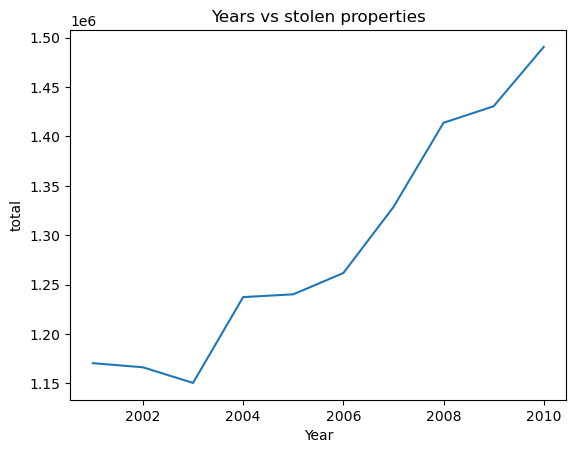

In [67]:
dt = dff.groupby('Year')['total'].sum()
sns.lineplot(data=dt)
plt.title('Years vs stolen properties')
plt.show()

- stealing properties is increasing rapidly from year 2006 untile it reaches its peak in 2010
- a little drop of recorded cases of stealing properties happened in 2003 to reincrease again in 2004 
- security in india is a real serious issue

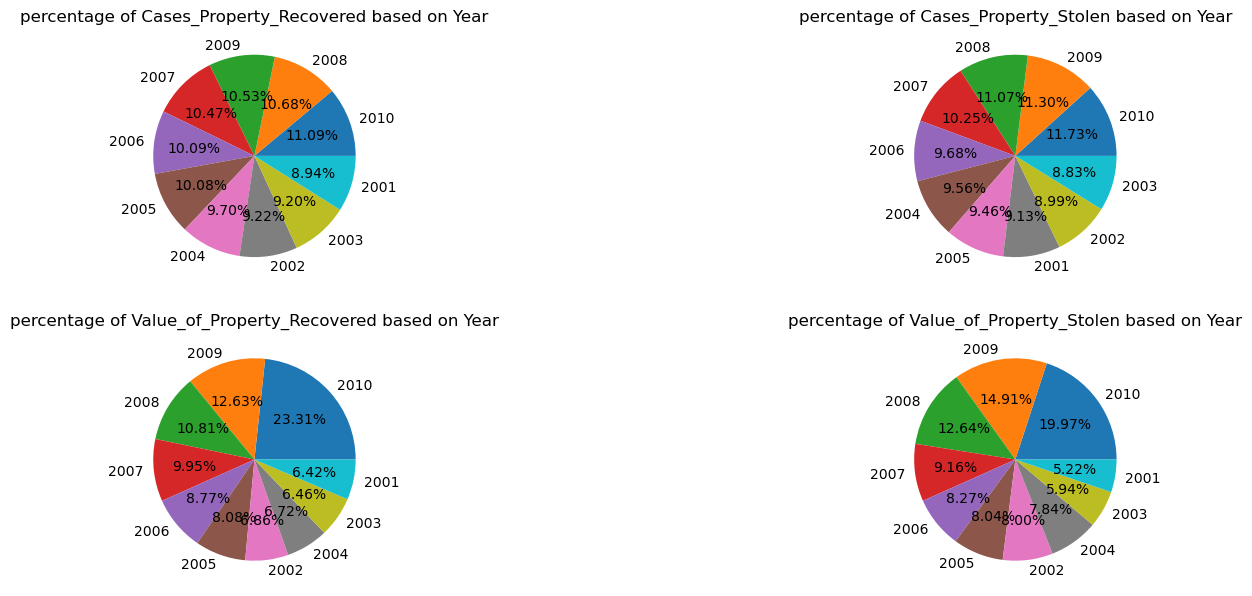

In [68]:
plt.figure(figsize=(18,23))
plot= 1
cols = dff.columns[3:7]
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(6,2,plot)
        dtt = dff.groupby('Year')[i].sum().sort_values(ascending=False).reset_index()
        plt.pie(x=dtt[i] , labels=dtt['Year'], autopct='%0.2f%%' , data=dtt)
        plt.title('percentage of {} based on Year'.format(i))
    plot +=1
    
plt.show()

- year 2010 recorded the highest values of stolen and recovered properties
- year 2010 recorded the highest number of cases of stolen and recovered properties
- year 2001 recorded the lowest values of stolen and recovered properties
- year 2001 recorded the lowest number of cases of stolen and recovered properties

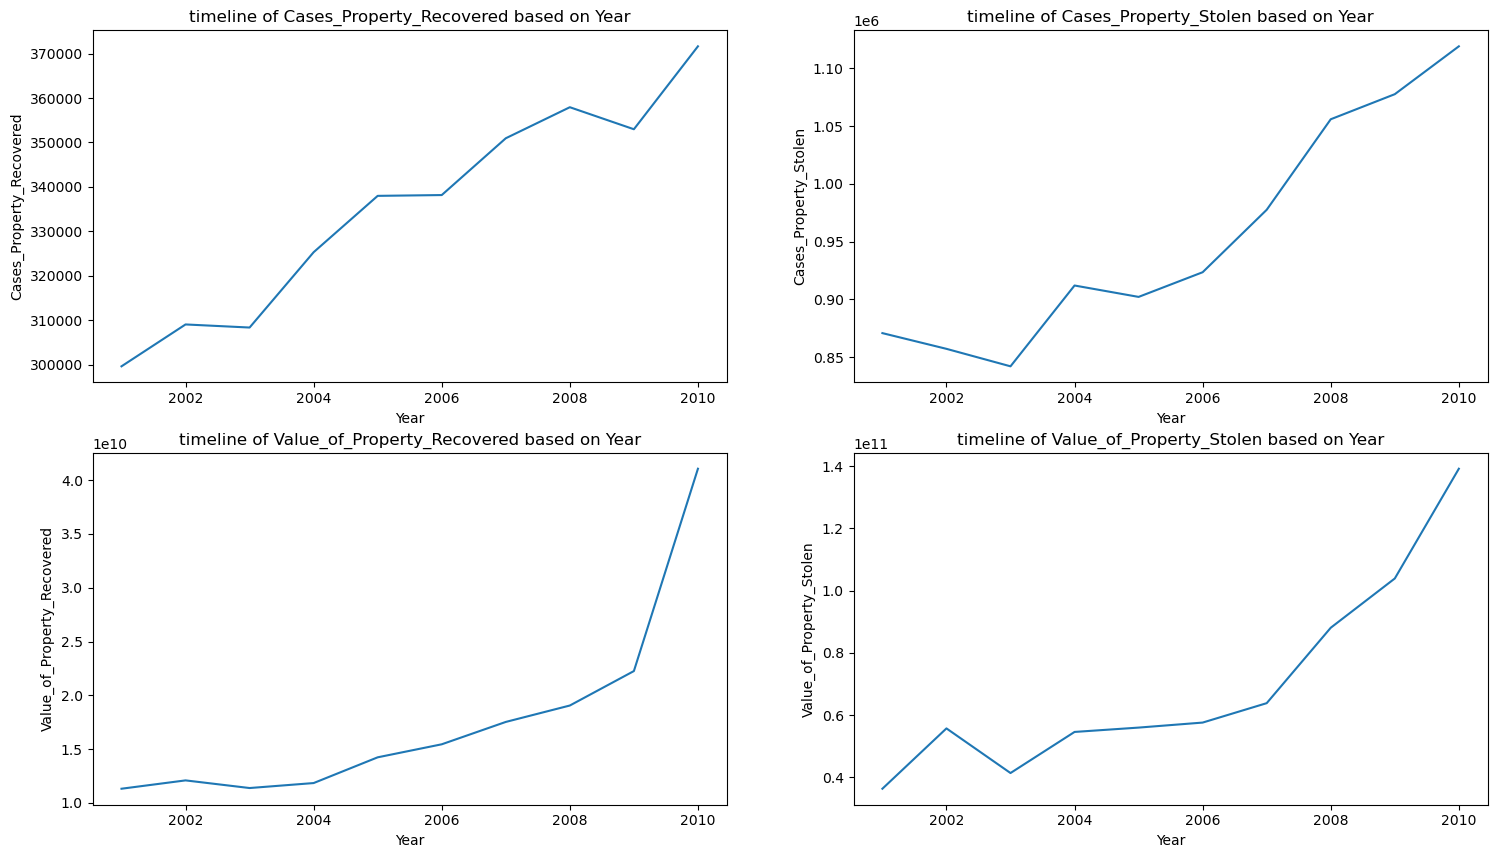

In [72]:
plt.figure(figsize=(18,32))
plot= 1
cols = dff.columns[3:7]
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(6,2,plot)
        dtt = dff.groupby('Year')[i].sum()
        sns.lineplot(data=dtt)
        plt.title('timeline of {} based on Year'.format(i))
    plot +=1
    
plt.show()

- 2003 recorded the lowest number of stolen properties while 2010 recorded the highest number
- 2001 recorded the lowest number of recovered properties while 2010 recorded the highest
- 2001 recorded the lowest total values of recovered properties while 2010 recorded the  highest
- 2001 recorded the lowest total values of stolen properties while 2010 recorded the  highest

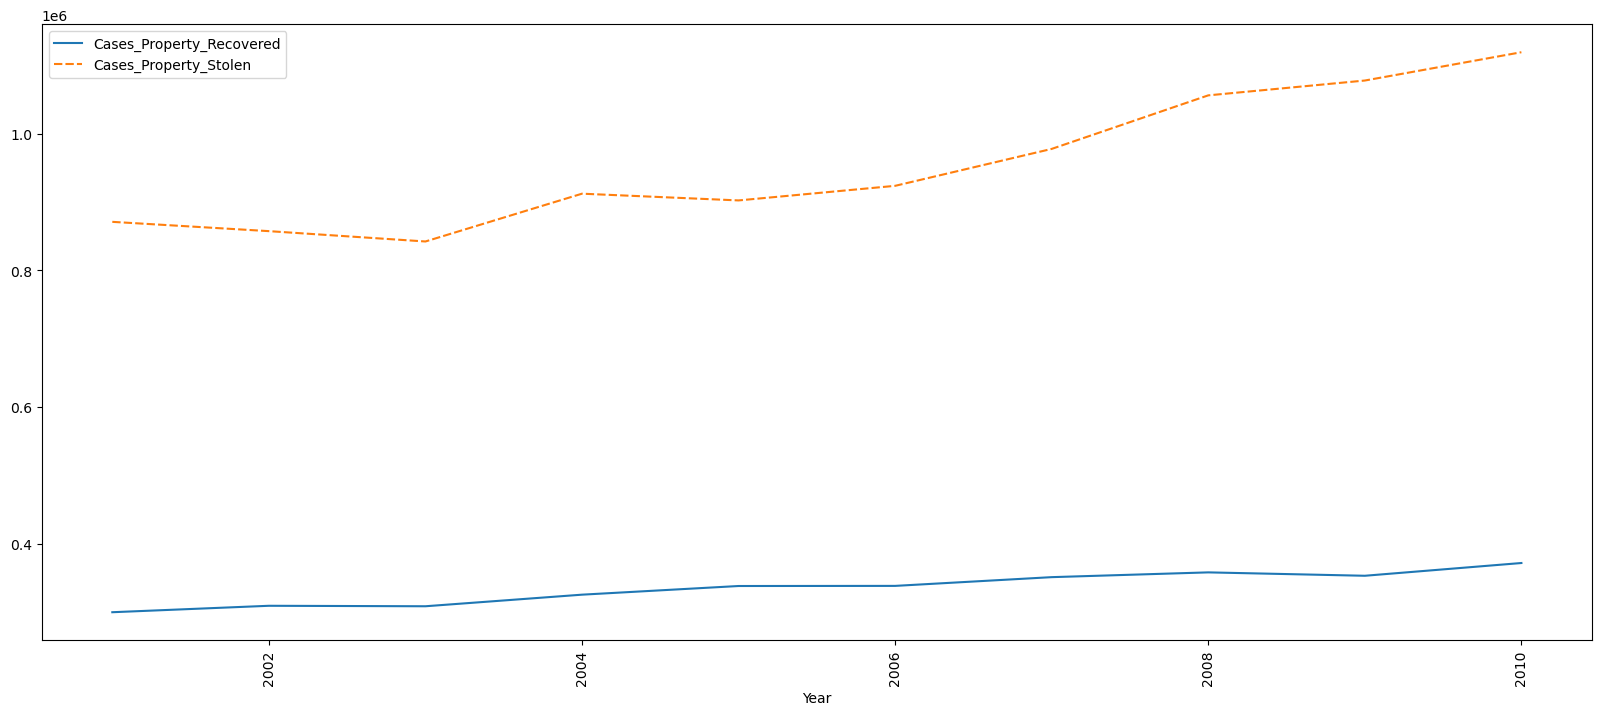

In [73]:
dtt = dff.groupby(['Year'])['Cases_Property_Recovered','Cases_Property_Stolen'].sum()
plt.figure(figsize=(20,8))
sns.lineplot(data=dtt)
plt.xticks(rotation=90)
plt.show()

- cases of stolen properties are much higher than recovered ones in a decade

# 2.4 Analysis of area vs overall crime

In [74]:
dff.groupby('Area km^2')['total'].sum().sort_values(ascending=False).reset_index()

,Area km^2,total
0,307713,2051035
1,308252,1097822
2,162970,1073317
3,240928,866807
4,130060,851331
5,1483,820775
6,196244,812336
7,191791,752233
8,342239,716936
9,44212,540664


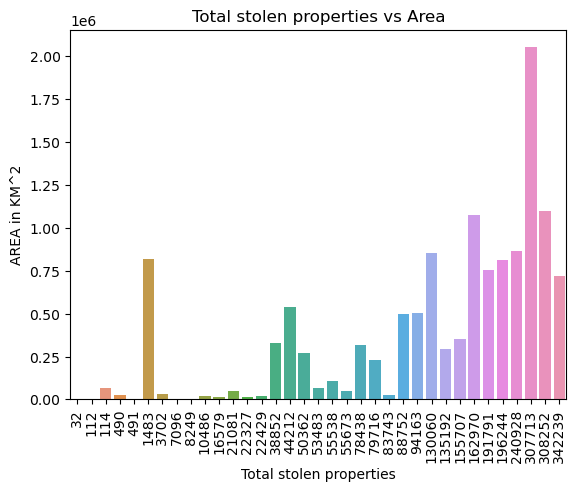

In [75]:
dt = dff.groupby('Area km^2')['total'].sum().sort_values(ascending=False).reset_index()
sns.barplot(y='total' , x='Area km^2' , data=dt)
plt.title('Total stolen properties vs Area')
plt.xlabel('Total stolen properties')
plt.ylabel('AREA in KM^2')
plt.xticks(rotation=90)
plt.show()

- Area of 307713 km^2 of state MAHARASHTRA has the highest number of stolen properties and Area of 308252 km^2 of state MADHYA PRADESH is the second

# 2.5 Analysis of Population vs overall Crime

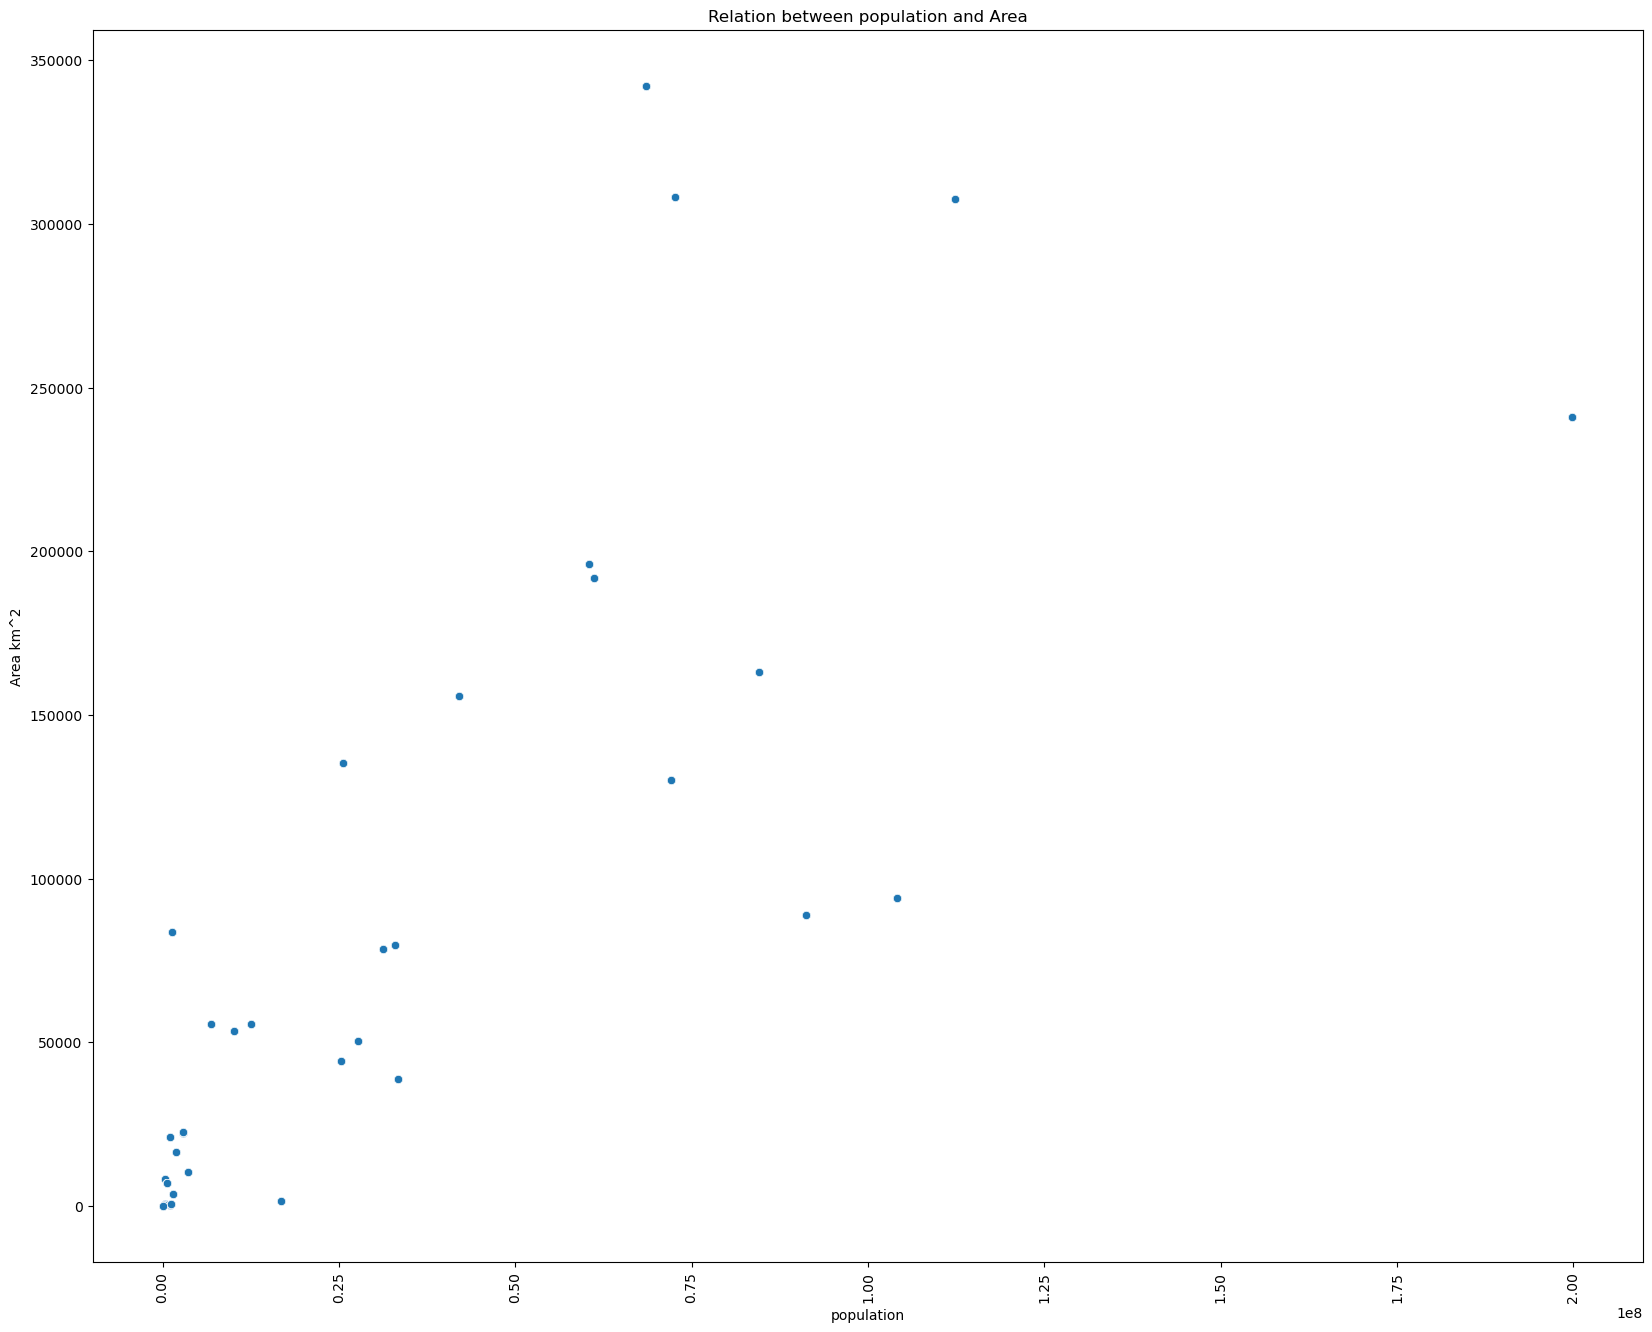

In [77]:
data = dff[dff['Year'] == 2010]
plt.figure(figsize=(20,16))
sns.scatterplot(x=data['population'] , y=data['Area km^2'] )
plt.title('Relation between population and Area')
plt.xticks(rotation=90)
plt.show()


-    In INdia the majority of states are highly density populated
 -   Delhi is the highest populated density state
 -   ARUNACHAL PRADESH is the lowest populated state



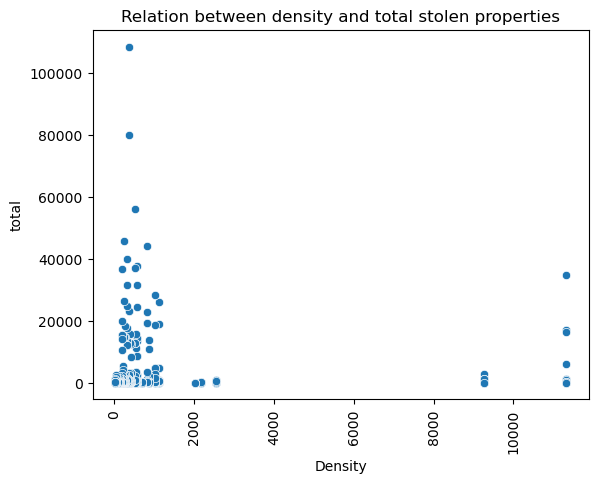

In [78]:
data = dff[dff['Year'] == 2010]
popu = data[['Density','total']].sort_values(by='Density' , ascending=False).reset_index()
sns.scatterplot(x=popu['Density'] , y=popu['total'] )
plt.title('Relation between density and total stolen properties')
plt.xticks(rotation=90)
plt.show()

-according to our statistics in year 2010 we summerize that :

-    in india Populated area does not make it more prone to robbery
 -   in year 2010 the majority of crimes of stealing properties committed happened in low populated areas
 - most of crimes stealing properties happened in state MAHARASHTRA which is not the most densily populated area